Pre-visualization of the normalized count data before any differential analysis

# Load

## Libraries and functions

In [2]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [3]:
source("functions.R")

## Data

In [4]:
load("../results/dge/norm_counts.RData")

In [5]:
head(norm_counts)

GF_104w_F_1_2 GF_104w_F_2_2 GF_104w_F_3_2 GF_104w_M_1_2
0610005C13Rik    0.00000       0.00000       0.00000       1.747854  
0610007P14Rik  857.59757     740.81613     899.06639     875.674692  
0610009B22Rik 1008.62104    1155.42062    1166.35639    1210.388671  
0610009L18Rik   27.86743      35.77805      17.99933      20.100317  
0610009O20Rik  214.84887     275.70146     262.79017     223.725271  
0610010B08Rik    0.00000       0.00000       0.00000       0.000000  
              GF_104w_M_2_2 GF_52w_M_1_2 GF_52w_M_2_2 GF_52w_M_3_2 GF_52w_M_4_2
0610005C13Rik    1.244311      0.8338695   4.892544      5.547012    7.158344  
0610007P14Rik  981.138840    503.6571924 525.459208    509.215656  730.866890  
0610009B22Rik 1539.834260   1028.9949924 867.937277   1006.227887  869.022923  
0610009L18Rik   37.951471     31.6870419  26.419737     22.188046    4.295006  
0610009O20Rik  268.771071    296.8575505 346.392104    391.619012  306.377109  
0610010B08Rik    0.000000      0.0000000   0.000000      0.000000    0.000000  
              GF_8w_M_1_2 ⋯ SPF_8w_F_4_2 SPF_8w_F_5_2 GF_8w_F_1_2 GF_8w_F_2_2
0610005C13Rik   8.384882  ⋯    2.57208      0.00000     18.04370     0.00000 
0610007P14Rik 597.722277  ⋯  897.65596    947.91171    888.38701   674.46562 
0610009B22Rik 939.106744  ⋯ 1280.89590   1431.97437   1028.49105  1009.00917 
0610009L18Rik  61.089852  ⋯  101.59716     71.27956     47.76274    19.36265 
0610009O20Rik 356.956390  ⋯  225.05701    182.98632    229.26116   157.05260 
0610010B08Rik   0.000000  ⋯    0.00000      0.00000      0.00000     0.00000 
              GF_8w_F_3_2 GF_8w_F_4_2 GF_8w_F_5_2 GF_104w_M_3_2 GF_104w_M_5_2
0610005C13Rik    2.001891   5.212621     0.00000    1.243886      1.039189   
0610007P14Rik  605.571925 586.941079   799.60448  490.090915    592.337898   
0610009B22Rik 1129.066334 949.739473  1080.92333  685.380950    802.254135   
0610009L18Rik   11.010399  44.828537    24.07684   24.877711     22.862164   
0610009O20Rik  268.253349 301.289471   266.11243  334.605219    364.755442   
0610010B08Rik    0.000000   0.000000     0.00000    0.000000      0.000000   
              GF_104w_M_4_2
0610005C13Rik   1.495931   
0610007P14Rik 741.981645   
0610009B22Rik 780.875844   
0610009L18Rik  38.894199   
0610009O20Rik 393.429783   
0610010B08Rik   0.000000

# Sample clustering

In [6]:
col_order = colnames(norm_counts)
col_order_metadata = t(sapply(sapply(col_order, strsplit, split = "_"), unlist))
col_order_metadata = col_order_metadata[,c(-4,-5)]
colnames(col_order_metadata) = c("type", "age", "gender")
colors = cbind(col_order_metadata[,3],col_order_metadata[,2],col_order_metadata[,1])
color_SPF = rgb(204,85,79, maxColorValue=255)
color_GF = rgb(107,140,206, maxColorValue=255)
color_104w = rgb(143,98,202, maxColorValue=255)
color_52w = rgb(193,136,63, maxColorValue=255)
color_8w = rgb(74,171,131, maxColorValue=255)
color_F = rgb(126,163,66, maxColorValue=255)
color_M = rgb(199,93,156, maxColorValue=255)
colors[,3] = replace(colors[,3],colors[,3] == "SPF", color_SPF)
colors[,3] = replace(colors[,3],colors[,3] == "GF", color_GF)
colors[,2] = replace(colors[,2],colors[,2] == "104w",color_104w)
colors[,2] = replace(colors[,2],colors[,2] == "52w",color_52w)
colors[,2] = replace(colors[,2],colors[,2] == "8w",color_8w)
colors[,1] = replace(colors[,1],colors[,1] == "F",color_F)
colors[,1] = replace(colors[,1],colors[,1] == "M",color_M)

## With all genes

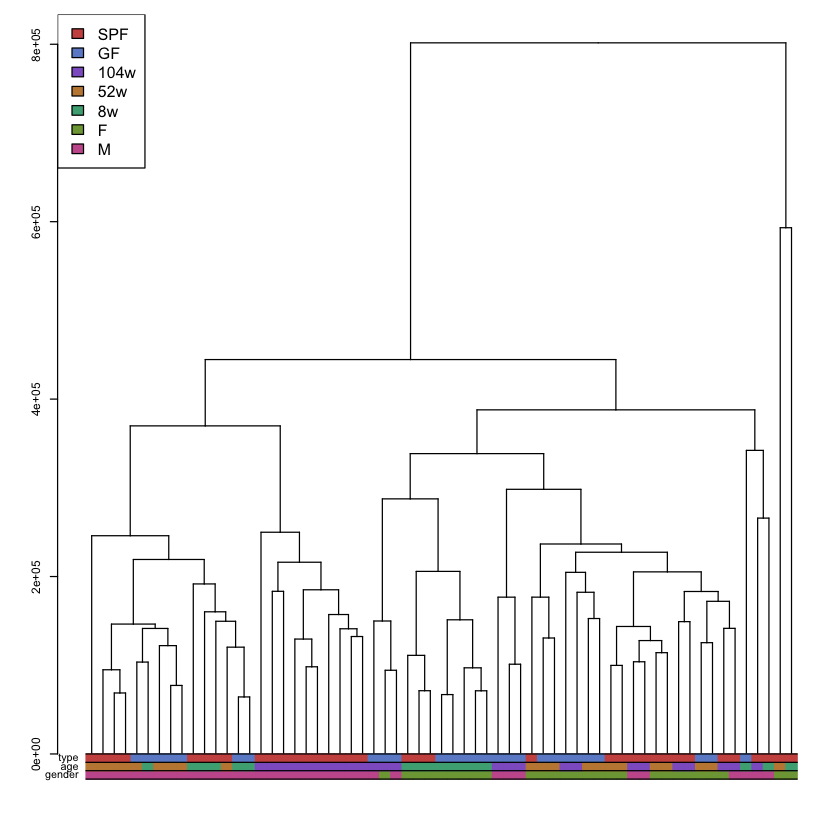

In [7]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "average"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topleft",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

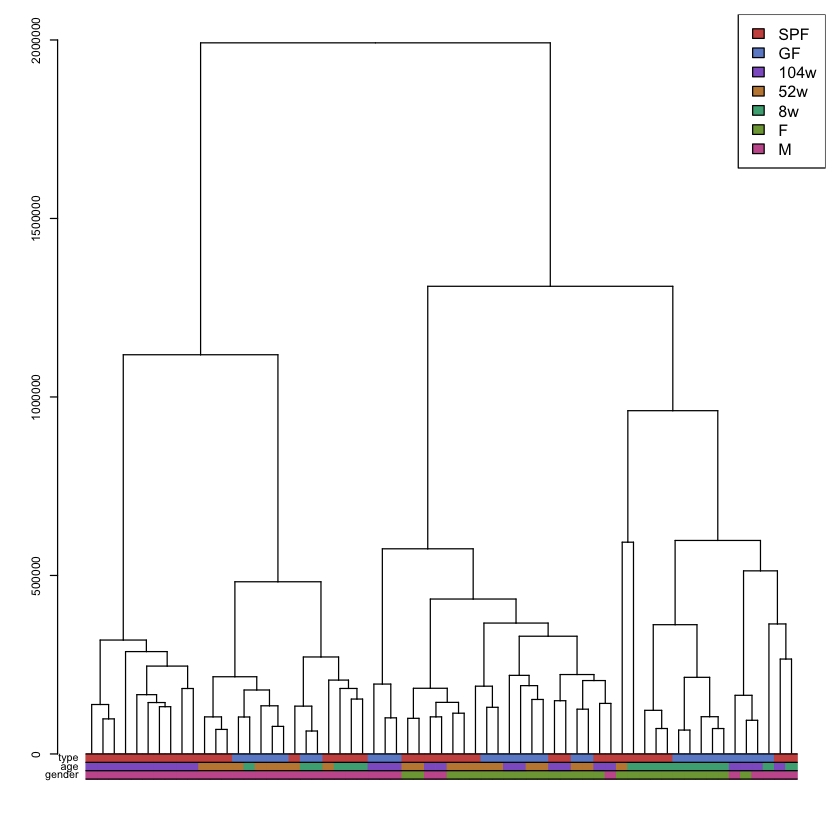

In [8]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

## Without X/Y genes

In [9]:
annot = read.table("../data/mm10_UCSC_07_15_genes.gtf", sep="\t")
chrX_chrY_desc = annot[annot$V1 == 'chrX' | annot$V1 == 'chrX_GL456233_random' | annot$V1 == 'chrY',9]
chrX_chrY_genes = unique(sapply(sapply(as.character(chrX_chrY_desc), strsplit, split = " |;"),function(i) i[2]))

In [10]:
chrX_chrY_counts = norm_counts[which(rownames(norm_counts) %in% chrX_chrY_genes),]
non_chrX_chrY_counts = norm_counts[-which(rownames(norm_counts) %in% chrX_chrY_genes),]

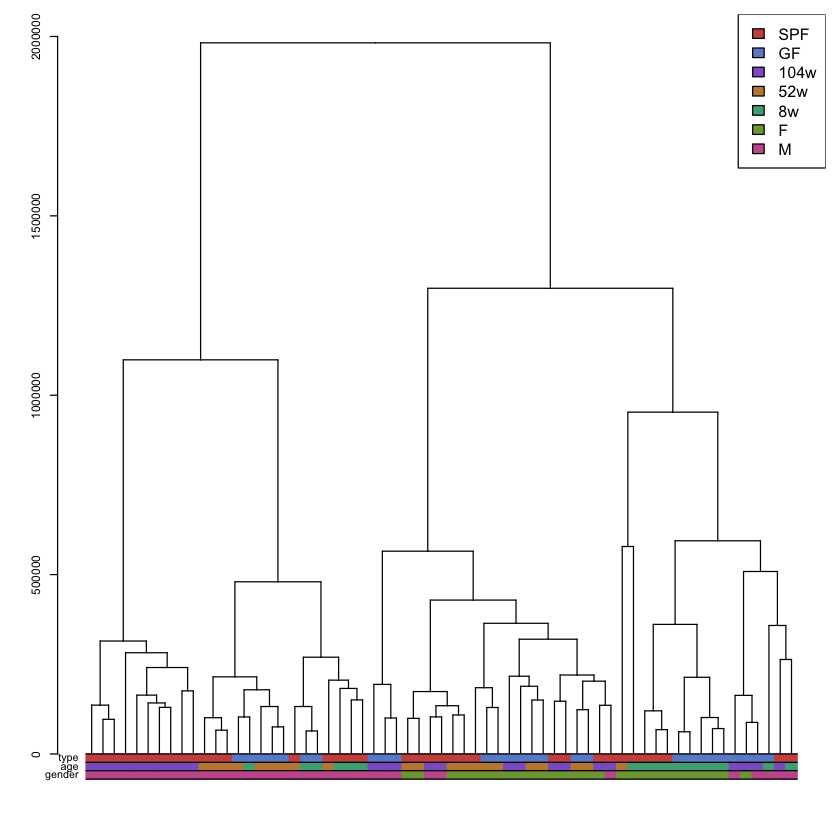

In [11]:
sampleTree = as.dendrogram(hclust(dist(t(non_chrX_chrY_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

# PCA

In [12]:
pca_data = t(norm_counts)
metadata = as.data.frame(t(sapply(sapply(rownames(pca_data), strsplit, split = "_"), unlist)))
metadata = metadata[,c(-4,-5)]
colnames(metadata) = c("type", "age", "gender")
metadata$type = factor(metadata$type)
metadata$age = factor(metadata$age)
metadata$gender = factor(metadata$gender)

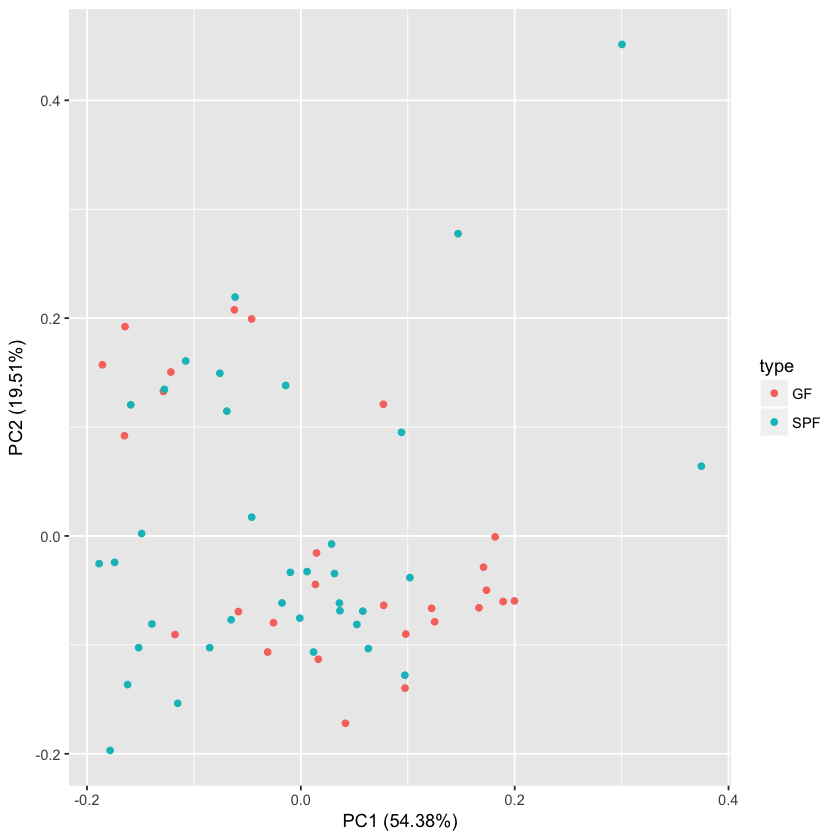

In [13]:
autoplot(prcomp(pca_data), data = metadata, colour = 'type')

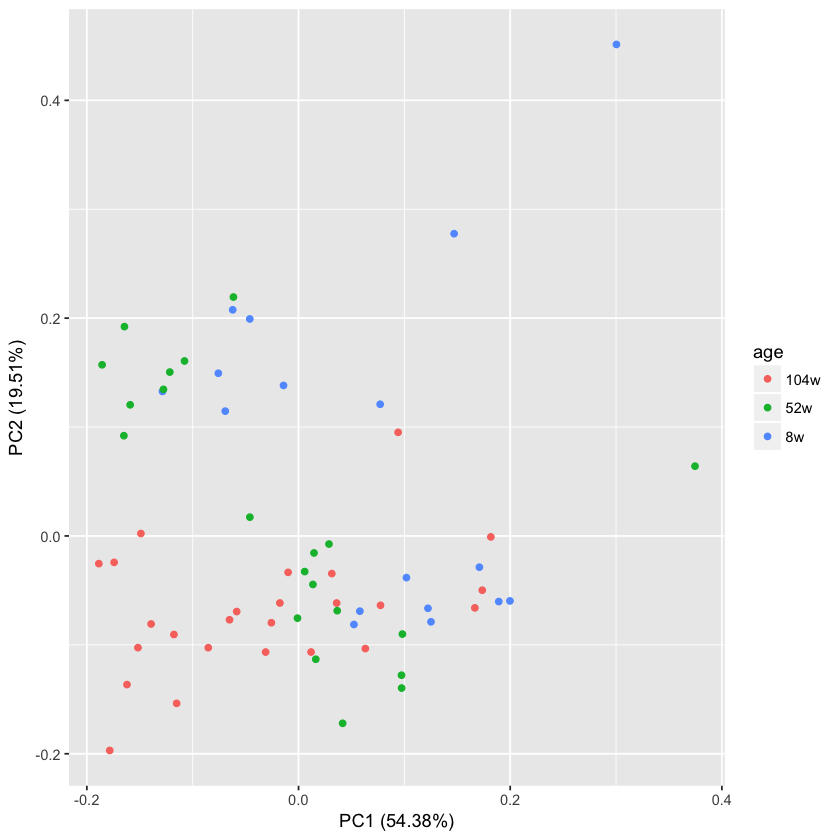

In [14]:
autoplot(prcomp(pca_data), data = metadata, colour = 'age')

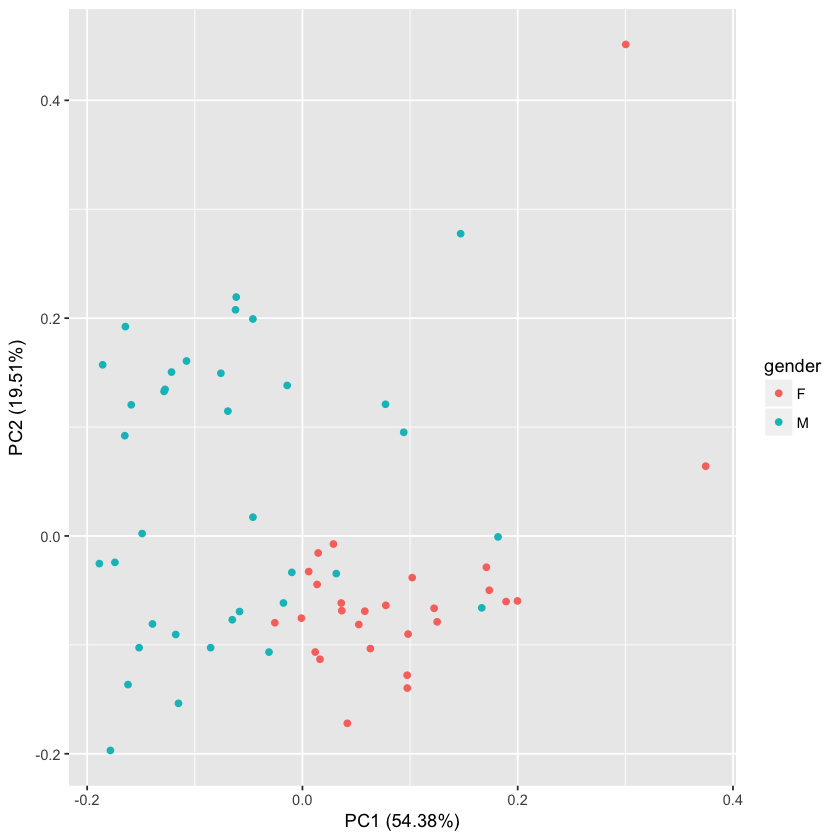

In [15]:
autoplot(prcomp(pca_data), data = metadata, colour = 'gender')

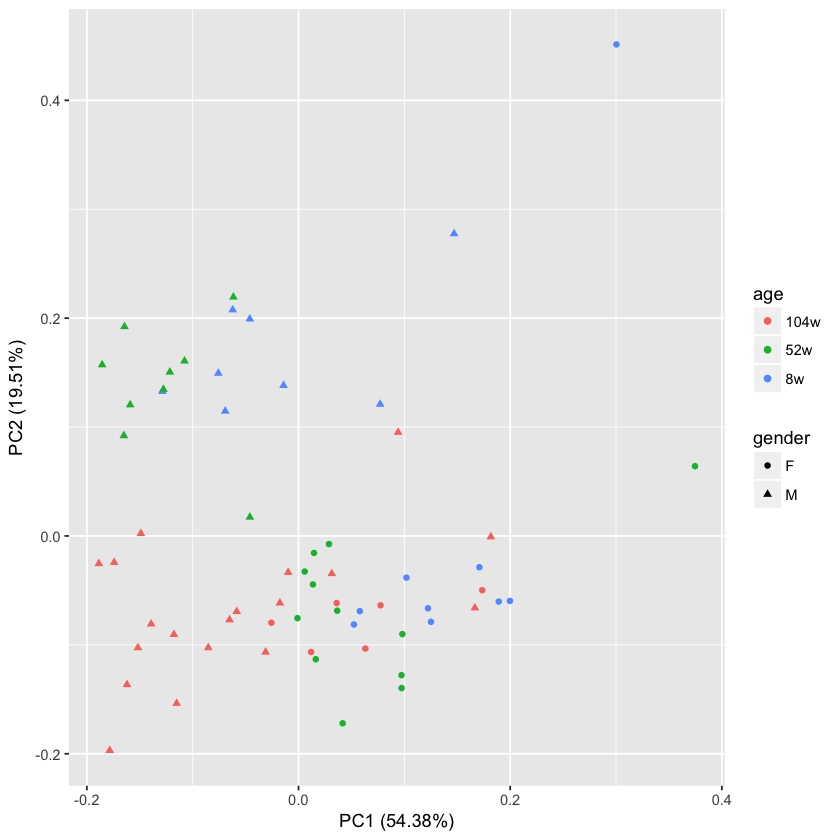

In [16]:
autoplot(prcomp(pca_data), data = metadata, colour = 'age', shape = 'gender')

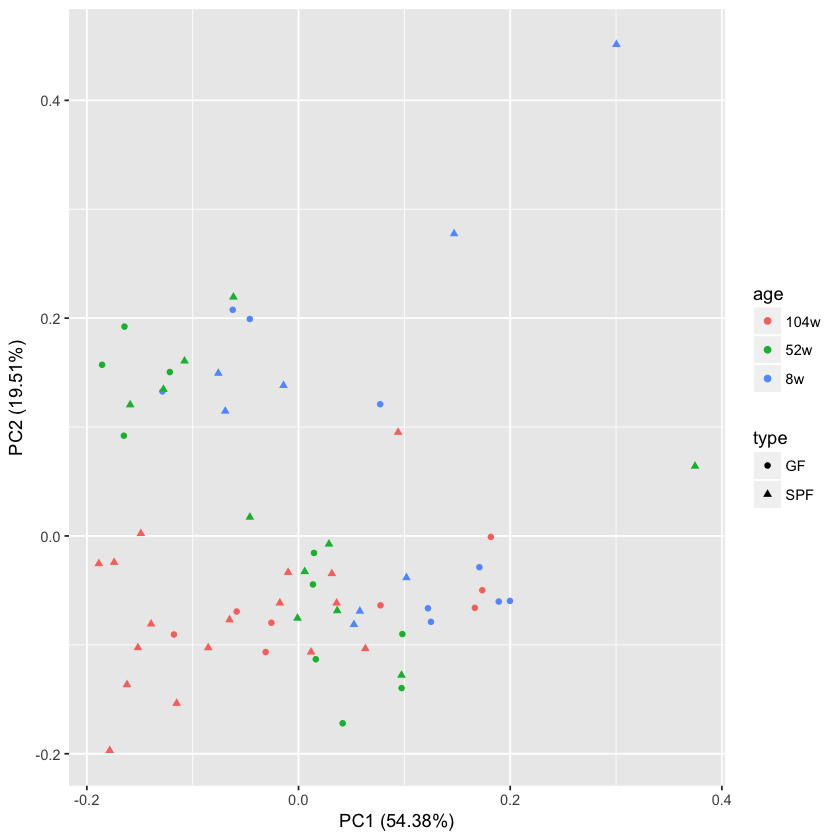

In [17]:
autoplot(prcomp(pca_data), data = metadata, colour = 'age', shape = 'type')

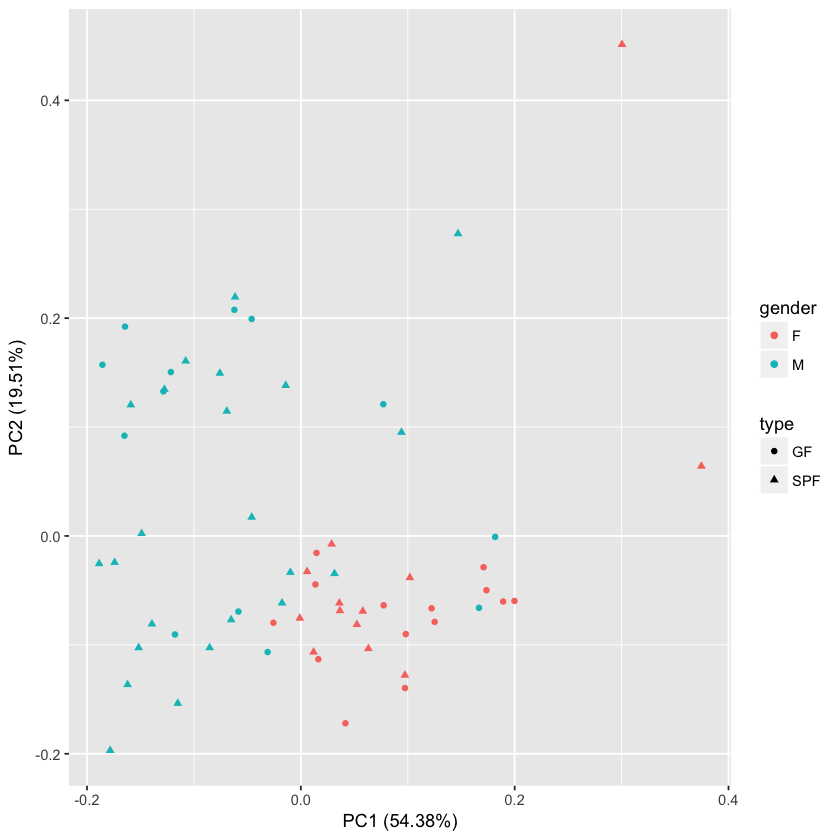

In [18]:
autoplot(prcomp(pca_data), data = metadata, colour = 'gender', shape = 'type')

# Gene co-expression network analysis


## Build network

In [19]:
# Filter genes that have a count > 10 in more than 90% of the samples
dim(norm_counts)
to_keep = rownames(norm_counts)[which(rowSums(norm_counts >= 10)>=0.5*dim(norm_counts)[2])]
filtered_norm_counts = norm_counts[to_keep,]
dim(filtered_norm_counts)
gene_names = rownames(filtered_norm_counts)

[1] 24421    63

[1] 11170    63

In [20]:
networkType = "signed hybrid"

pickSoftThreshold: will use block size 4005.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4005 of 11170
   ..working on genes 4006 through 8010 of 11170
   ..working on genes 8011 through 11170 of 11170
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.  max.k.
1      1   0.0868  0.882          0.888 1080.000  1.09e+03 1690.00
2      2   0.2860 -1.170          0.863  336.000  3.22e+02  799.00
3      3   0.5750 -1.720          0.923  133.000  1.16e+02  460.00
4      4   0.6710 -2.020          0.935   61.500  4.70e+01  296.00
5      5   0.7370 -2.100          0.954   31.700  2.09e+01  205.00
6      6   0.7430 -2.220          0.956   17.700  9.85e+00  148.00
7      7   0.7790 -2.190          0.968   10.600  4.92e+00  111.00
8      8   0.7990 -2.150          0.974    6.640  2.53e+00   85.60
9      9   0.8190 -2.120          0.978    4.350  1.35e+00   67.20
10    10   0.8340 -2.050          0.982    2.950  7.41e-01   53.70
11    12

Power SFT.R.sq   slope      truncated.R.sq mean.k.      median.k.   
1   1    0.08682157  0.8820601 0.8877917      1081.1068565 1.089741e+03
2   2    0.28622457 -1.1729565 0.8631891       336.3461812 3.222064e+02
3   3    0.57483023 -1.7238558 0.9230250       133.0766539 1.155664e+02
4   4    0.67059084 -2.0210959 0.9346949        61.4749048 4.700680e+01
5   5    0.73662969 -2.1024598 0.9538173        31.6924296 2.089565e+01
6   6    0.74338186 -2.2197752 0.9564366        17.7373675 9.852889e+00
7   7    0.77934389 -2.1914854 0.9684850        10.5815646 4.915240e+00
8   8    0.79898550 -2.1545864 0.9744351         6.6431563 2.525501e+00
9   9    0.81862291 -2.1163663 0.9783691         4.3482460 1.346482e+00
10 10    0.83443100 -2.0512651 0.9824172         2.9466684 7.411700e-01
11 12    0.85590807 -1.9520372 0.9863926         1.4714913 2.384285e-01
12 14    0.87303836 -1.8717587 0.9862762         0.8021158 8.270069e-02
13 16    0.88236278 -1.7975866 0.9794021         0.4677393 3.116421e-02
14 18    0.91753298 -1.6901870 0.9847788         0.2877587 1.192253e-02
15 20    0.94216559 -1.6019139 0.9880597         0.1849243 4.786690e-03
   max.k.     
1  1686.156755
2   798.575992
3   460.255658
4   296.282031
5   204.558497
6   148.173791
7   111.129137
8    85.561574
9    67.234901
10   53.700873
11   35.566779
12   24.454629
13   17.284522
14   12.479439
15    9.164832

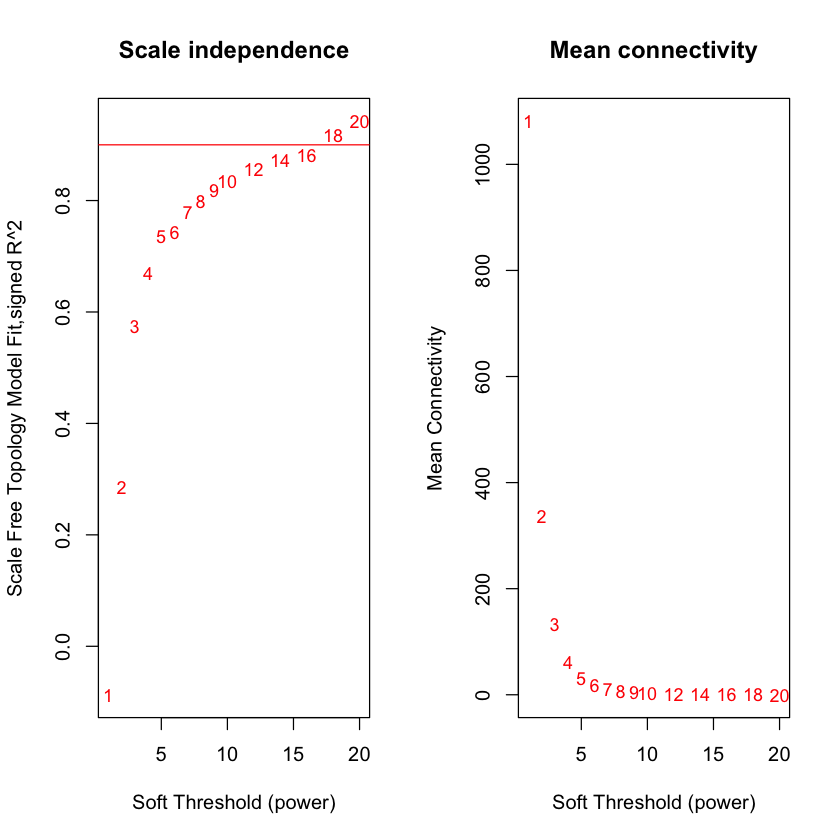

In [21]:
powers = c(seq(1, 10, by = 1), seq(12, 20, by = 2))
# Choosing the soft-thresholding power
sft = pickSoftThreshold(t(filtered_norm_counts),
                        powerVector = powers,
                        dataIsExpr = T,
                        RsquaredCut = 0.85,
                        verbose = 5,
                        networkType = networkType)
par(mfrow = c(1,2))
cex1 = 0.9
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit,signed R^2",
     type="n",
     main = paste("Scale independence"))
text(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,
     cex=cex1,
     col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     sft$fitIndices[,5],
     xlab="Soft Threshold (power)",
     ylab="Mean Connectivity",
     type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")
sft$fitIndices

In [22]:
sft$fitIndices[(-sign(sft$fitIndices[,3])*sft$fitIndices[,2])>=0.8,c(1,5)]

Power mean.k.  
9   9    4.3482460
10 10    2.9466684
11 12    1.4714913
12 14    0.8021158
13 16    0.4677393
14 18    0.2877587
15 20    0.1849243

Parameters for network construction
- Soft-thresholding power parameter: 9 (R2 > 0.80 and mean connectivity highest as possible (Ref: https://www.degruyter.com/view/j/sagmb.2005.4.issue-1/sagmb.2005.4.1.1128/sagmb.2005.4.1.1128.pdf))
- Minimum module size: 30
- Height for module merging: 0.25 (below)
- Biweight Midcorrelation

In [23]:
soft_thresholding_power = 9
min_module_size = 40
mergeCutHeight = 0.35
# Block-wise network construction and module detection
bwnet = blockwiseModules(t(filtered_norm_counts),
                 checkMissingData = TRUE,
                 maxBlockSize = 8000,
                 power = soft_thresholding_power,
                 networkType = networkType,
                 TOMType = "signed",
                 numericLabels = TRUE,
                 saveTOMs = TRUE,
                 saveTOMFileBase = "norm_genes_TOM",
                 mergeCutHeight = mergeCutHeight, 
                 verbose=3,
                 corType="bicor",
                 maxPOutliers=0,
                 minModuleSize = min_module_size,
                 reassignThreshold = 0,
                 deepSplit = 2)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2 
7606 3564 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file norm_genes_TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 2 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 6 because their KME is too low.
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..co

In [24]:
# Modules
mod_sizes = table(bwnet$colors)
names(mod_sizes) = paste("ME", names(mod_sizes), sep="")
mod_sizes
module_nb = dim(table(bwnet$colors))-1
module_nb

 ME0  ME1  ME2  ME3  ME4  ME5  ME6  ME7  ME8  ME9 ME10 ME11 
6174 1565  806  781  612  374  324  179  162   80   73   40 

[1] 11

- 11 modules with between 40  and 1565 genes 
- 6174 genes not assigned to a module

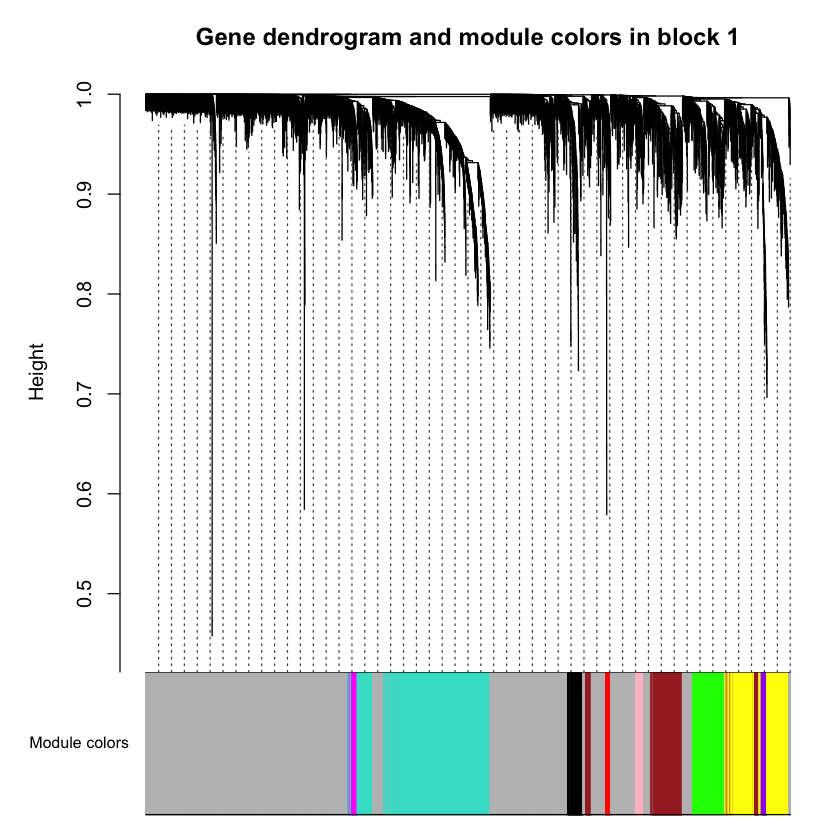

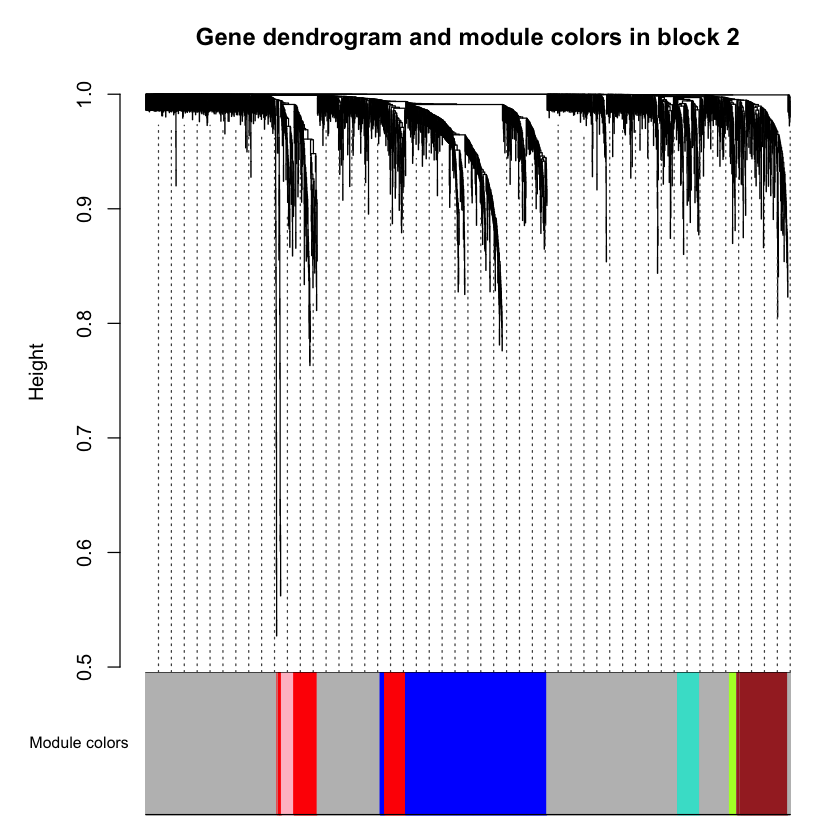

In [25]:
# Plot the dendrogram and the module colors underneath for the 3 blocks
bwModuleColors = labels2colors(bwnet$colors)
plotDendroAndColors(bwnet$dendrograms[[1]],
                    bwModuleColors[bwnet$blockGenes[[1]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 1",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[2]],
                    bwModuleColors[bwnet$blockGenes[[2]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 2",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)

In [26]:
# Get genes that are in one module
in_mod = is.finite(match(bwnet$colors, seq(1:module_nb)))
mod_genes = gene_names[in_mod]
length(mod_genes)
sum(in_mod)

[1] 4996

[1] 4996

In [27]:
pal2 = unique(labels2colors(bwnet$colors))
names(pal2) = unique(bwnet$colors)
pal2 = pal2[order(as.integer(names(pal2)))]
pal2
save(pal2, file = "../results/dge/dge_net_pal2.RData")

0             1             2             3             4 
       "grey"   "turquoise"        "blue"       "brown"      "yellow" 
            5             6             7             8             9 
      "green"         "red"       "black"        "pink"     "magenta" 
           10            11 
     "purple" "greenyellow"

## Network visualization

In [28]:
# Get the Topological Overlap Matrix (TOM)
TOM = TOMsimilarityFromExpr(t(filtered_norm_counts), power = soft_thresholding_power)

TOM calculation: adjacency..
..will use 4 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [29]:
# Filter TOM for the genes in the modules
mod_TOM = TOM[in_mod, in_mod]
dimnames(mod_TOM) = list(mod_genes, mod_genes)

In [30]:
# Transform into adjency matrix while keeping gene connection if the value > 0.005
adjency = (as.matrix(mod_TOM)>0.005)*1
head(adjency)

0610007P14Rik 0610009B22Rik 0610009O20Rik 0610010K14Rik Mettl26
0610007P14Rik 1             1             0             0             0      
0610009B22Rik 1             1             0             0             0      
0610009O20Rik 0             0             1             0             0      
0610010K14Rik 0             0             0             1             0      
Mettl26       0             0             0             0             1      
0610030E20Rik 0             0             0             0             0      
              0610030E20Rik 0610037L13Rik Fmc1 1110004F10Rik Card19 ⋯ Zswim6
0610007P14Rik 0             0             0    0             0      ⋯ 0     
0610009B22Rik 0             0             0    0             0      ⋯ 0     
0610009O20Rik 0             0             0    0             0      ⋯ 0     
0610010K14Rik 0             0             1    0             1      ⋯ 0     
Mettl26       0             0             0    0             1      ⋯ 0     
0610030E20Rik 1             1             0    0             0      ⋯ 1     
              Zswim7 Zswim8 Zufsp Zxda Zyg11b Zyx Zzef1 Zzz3 Hikeshi
0610007P14Rik 0      1      0     0    0      0   0     0    0      
0610009B22Rik 0      0      0     0    0      0   0     0    1      
0610009O20Rik 0      1      0     0    0      0   0     0    0      
0610010K14Rik 1      0      0     0    1      0   0     0    1      
Mettl26       0      0      0     0    0      0   0     0    0      
0610030E20Rik 0      1      1     0    0      0   1     1    0

In [31]:
# Transform adjency matrix into network
net = graph_from_adjacency_matrix(adjency, diag = FALSE, weighted = TRUE, mode="undirected")
save(net, file = "../results/dge/dge_net.RData")

In [32]:
# Get node colors = module color
mod_colors = bwnet$colors
names(mod_colors) = gene_names
connected_gene_colors = as.character(mod_colors[in_mod])
names(connected_gene_colors) = names(mod_colors)[in_mod]
save(connected_gene_colors, file = "../results/dge/dge_net_connected_gene_colors.RData")

In [33]:
head(connected_gene_colors)
head(pal2[connected_gene_colors])

0610007P14Rik 0610009B22Rik 0610009O20Rik 0610010K14Rik       Mettl26 
          "4"           "5"           "1"           "4"           "4" 
0610030E20Rik 
          "1"

4           5           1           4           4           1 
   "yellow"     "green" "turquoise"    "yellow"    "yellow" "turquoise"

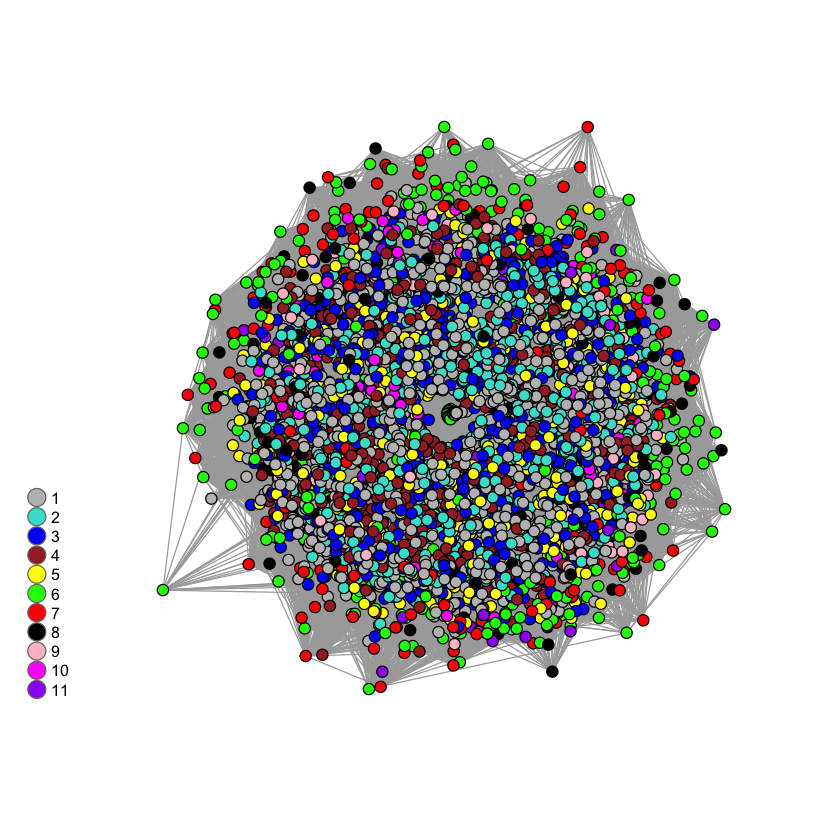

In [34]:
# Plot network
layout = layout_with_kk(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[mod_colors],
     layout=layout)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)
save(layout, file = "../results/dge/dge_layout.RData")

## Module analysis

In [35]:
module_genes = names(connected_gene_colors)[which(connected_gene_colors == 1)]
length(module_genes)

[1] 1565

In [36]:
all_genes = rownames(norm_counts)

In [37]:
module_gene_list = list()
for(i in 1:module_nb){
    print(i)
    module_genes = names(connected_gene_colors)[which(connected_gene_colors == i)]
    module_gene_bool = all_genes %in% module_genes
    names(module_gene_bool) = all_genes
    head(module_gene_bool)
    module_gene_list[[i]] = module_genes
    pwf = suppressMessages(nullp(module_gene_bool, 'mm10', 'geneSymbol', plot.fit=F))                        
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    adj_GO_wall = GO_wall[p.adjust(GO_wall[,"over_represented_pvalue"],method="BH")<.05,]
    print(head(adj_GO_wall[adj_GO_wall$ontology == "BP",]))
    write.table(adj_GO_wall, paste("../results/dge/modules/ME", i, "_GO", sep=""), sep = "\t", quote = FALSE, row.names = FALSE)    
}

[1] 1


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
17799 GO:0090304            6.732271e-37                        1        566
5756  GO:0016070            1.348307e-32                        1        511
3020  GO:0006139            3.396777e-29                        1        581
12953 GO:0046483            6.883528e-28                        1        584
4834  GO:0010467            1.653568e-27                        1        556
3420  GO:0006725            1.060674e-26                        1        585
      numInCat                                             term ontology
17799     4325                   nucleic acid metabolic process       BP
5756      3872                            RNA metabolic process       BP
3020      4848 nucleobase-containing compound metabolic process       BP
12953     4947                    heterocycle metabolic process       BP
4834      4726                                  gene expression       BP
3420      5011     cell

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
16368 GO:0070647            3.091339e-13                        1         80
5997  GO:0016567            1.909439e-12                        1         67
14460 GO:0051603            2.417010e-12                        1         67
8648  GO:0032446            4.636519e-12                        1         69
11979 GO:0044257            2.173275e-11                        1         67
7417  GO:0030163            2.493776e-11                        1         75
      numInCat                                                         term
16368      694 protein modification by small protein conjugation or removal
5997       541                                       protein ubiquitination
14460      590   proteolysis involved in cellular protein catabolic process
8648       582            protein modification by small protein conjugation
11979      622                           cellular protein catabolic process
7417 

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
16937 GO:0071704            2.743919e-23                        1        490
11965 GO:0044238            4.928763e-23                        1        470
3974  GO:0008152            3.120018e-22                        1        502
11964 GO:0044237            5.312527e-22                        1        466
4377  GO:0009056            2.322063e-20                        1        139
12158 GO:0044710            5.886847e-20                        1        232
      numInCat                                term ontology
16937     9446 organic substance metabolic process       BP
11965     8887           primary metabolic process       BP
3974      9868                   metabolic process       BP
11964     8866          cellular metabolic process       BP
4377      1611                   catabolic process       BP
12158     3454   single-organism metabolic process       BP
[1] 4


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
9705  GO:0034641            4.807047e-33                        1        250
11964 GO:0044237            1.535082e-32                        1        339
3974  GO:0008152            4.655645e-32                        1        370
17005 GO:0071840            1.196809e-30                        1        233
3590  GO:0007005            2.174423e-30                        1         78
3465  GO:0006807            7.690920e-30                        1        252
      numInCat                                          term ontology
9705      5508  cellular nitrogen compound metabolic process       BP
11964     8866                    cellular metabolic process       BP
3974      9868                             metabolic process       BP
17005     5620 cellular component organization or biogenesis       BP
3590       621                    mitochondrion organization       BP
3465      5831           nitrogen compoun

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11972 GO:0044248            1.349996e-10                        1         58
12359 GO:0045184            3.791994e-09                        1         68
11984 GO:0044265            4.130686e-09                        1         40
4378  GO:0009057            7.501194e-09                        1         45
4377  GO:0009056            1.754315e-08                        1         61
18903 GO:1901575            2.194517e-08                        1         59
      numInCat                                     term ontology
11972     1304               cellular catabolic process       BP
12359     1809    establishment of protein localization       BP
11984      793 cellular macromolecule catabolic process       BP
4378       980          macromolecule catabolic process       BP
4377      1611                        catabolic process       BP
18903     1540      organic substance catabolic process       BP
[1] 6


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
3557  GO:0006952            7.626613e-19                        1         66
3560  GO:0006955            2.189496e-18                        1         60
1052  GO:0002376            1.020968e-17                        1         87
10116 GO:0035456            1.376979e-16                        1         15
4620  GO:0009605            5.104588e-15                        1         76
3556  GO:0006950            1.960846e-14                        1        103
      numInCat                          term ontology
3557      1323              defense response       BP
3560      1110               immune response       BP
1052      2158         immune system process       BP
10116       46   response to interferon-beta       BP
4620      1907 response to external stimulus       BP
3556      3099            response to stress       BP
[1] 7


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
12158 GO:0044710            1.973405e-07                0.9999999         58
13556 GO:0048518            2.788819e-07                0.9999999         74
13560 GO:0048522            1.398066e-06                0.9999994         67
11965 GO:0044238            1.443017e-06                0.9999993        108
5242  GO:0014067            2.674909e-06                1.0000000          4
16937 GO:0071704            3.986056e-06                0.9999981        111
      numInCat                                                           term
12158     3454                              single-organism metabolic process
13556     4974                      positive regulation of biological process
13560     4482                        positive regulation of cellular process
11965     8887                                      primary metabolic process
5242        12 negative regulation of phosphatidylinositol 3-kinase sig

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
3468  GO:0006810            2.240896e-05                0.9999895         57
14240 GO:0051234            3.402958e-05                0.9999837         58
3458  GO:0006790            4.123608e-05                0.9999931         10
      numInCat                              term ontology
3468      4082                         transport       BP
14240     4231     establishment of localization       BP
3458       262 sulfur compound metabolic process       BP
[1] 9


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 10


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
15    GO:0000028                       0                        1          8
936   GO:0002181                       0                        1          9
3177  GO:0006412                       0                        1         41
3251  GO:0006518                       0                        1         41
10964 GO:0042255                       0                        1          9
10976 GO:0042274                       0                        1         12
      numInCat                               term ontology
15          19   ribosomal small subunit assembly       BP
936         49            cytoplasmic translation       BP
3177       597                        translation       BP
3251       738          peptide metabolic process       BP
10964       52                  ribosome assembly       BP
10976       66 ribosomal small subunit biogenesis       BP
[1] 11


Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Fetching GO annotations...
For 2918 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)


In [38]:
capture.output(module_gene_list, file = "../results/dge/modules/genes_in_modules")

In [39]:
#graphjs(net,
#        layout=layout_with_fr(net, dim=3),
#        height=500,
#        vertex.size=1,
#        vertex.color=as.vector(pal2[connected_gene_colors]),
#        vertex.shape="sphere",
#        vertex.label=as.vector(names(connected_gene_colors)),
#        edge.color="grey")

In [40]:
for(mod_id in 1:module_nb){
    module_genes = names(connected_gene_colors)[which(connected_gene_colors==mod_id)]
    chX_chrY_nb = sum(module_genes %in% rownames(chrX_chrY_counts))   
    print(paste(mod_id, ": ", chX_chrY_nb, " - ", 100*chX_chrY_nb/length(module_genes), "%", sep=""))
}

[1] "1: 40 - 2.55591054313099%"
[1] "2: 41 - 5.08684863523573%"
[1] "3: 17 - 2.17669654289373%"
[1] "4: 15 - 2.45098039215686%"
[1] "5: 14 - 3.74331550802139%"
[1] "6: 7 - 2.16049382716049%"
[1] "7: 3 - 1.67597765363128%"
[1] "8: 8 - 4.93827160493827%"
[1] "9: 2 - 2.5%"
[1] "10: 3 - 4.10958904109589%"
[1] "11: 0 - 0%"


## Relation between modules and samples

In [41]:
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(t(filtered_norm_counts), mod_colors)$eigengenes
MEs = orderMEs(MEs0)

In [47]:
order_metadata = metadata

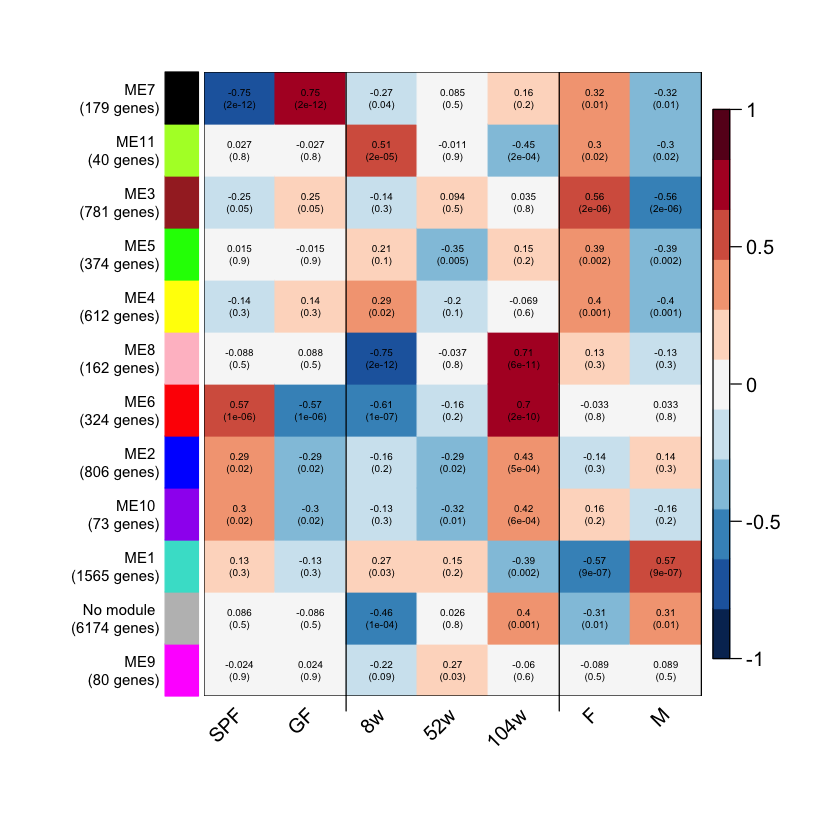

In [48]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF"),
              as.integer(order_metadata[,'type'] == "GF"),
              as.integer(order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'gender'] == "F"),
              as.integer(order_metadata[,'gender'] == "M"))
colnames(trait) = c("SPF", "GF", "8w", "52w", "104w", "F", "M")
plot_module_groups(trait, c(2,5))

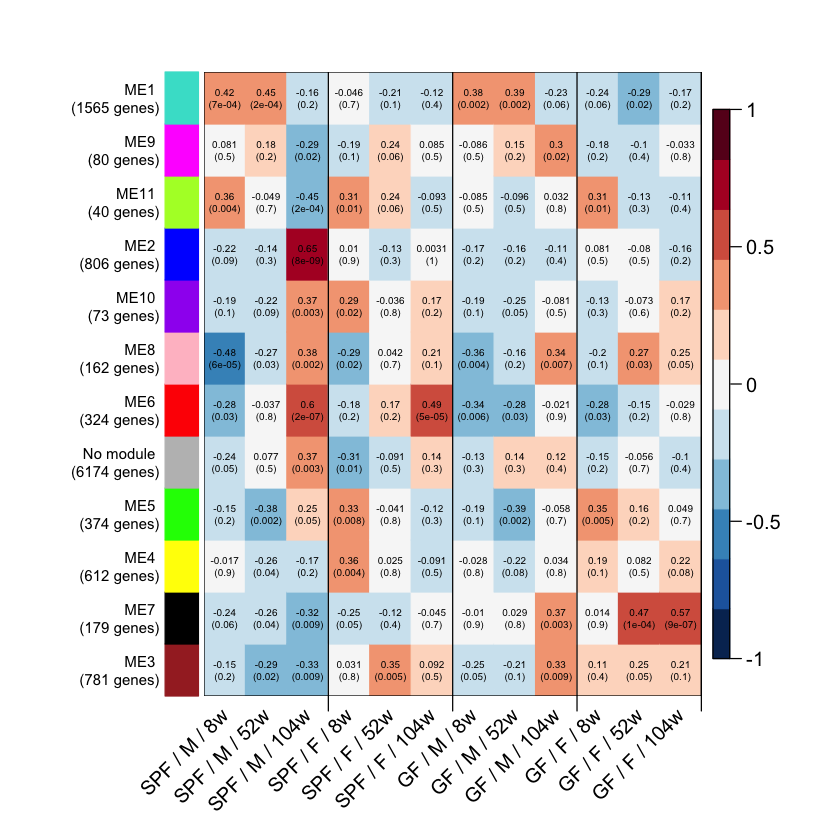

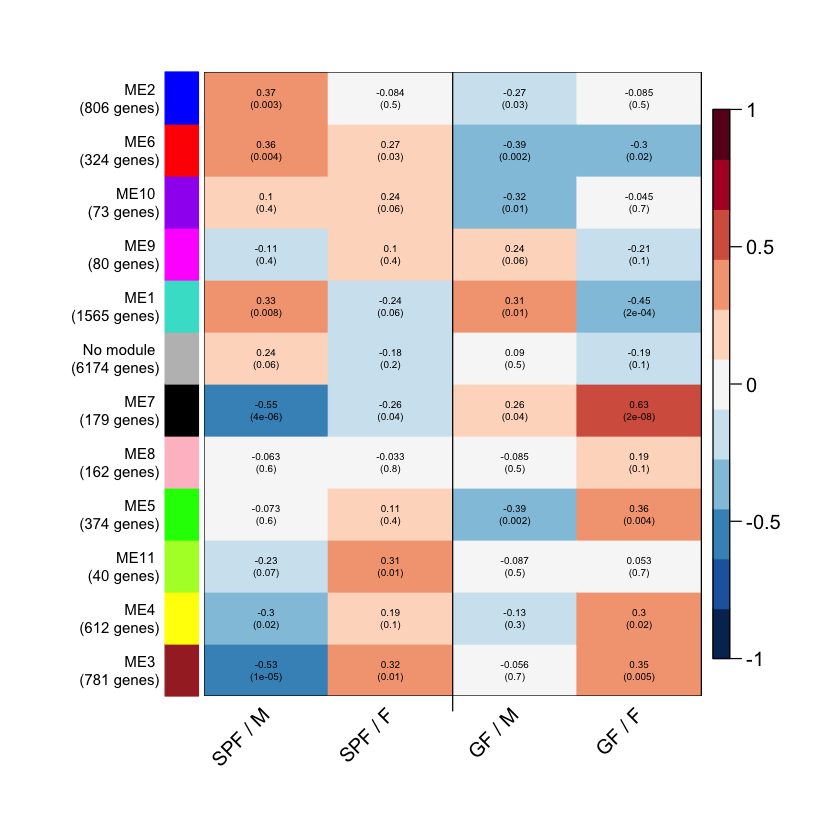

In [49]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("SPF / M / 8w", "SPF / M / 52w", "SPF / M / 104w",
                    "SPF / F / 8w", "SPF / F / 52w", "SPF / F / 104w",
                    "GF / M / 8w", "GF / M / 52w", "GF / M / 104w", 
                    "GF / F / 8w", "GF / F / 52w", "GF / F / 104w")
plot_module_groups(trait, seq(3, 12, by = 3))
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F"))
colnames(trait) = c("SPF / M", "SPF / F", "GF / M", "GF / F")
plot_module_groups(trait, c(2))

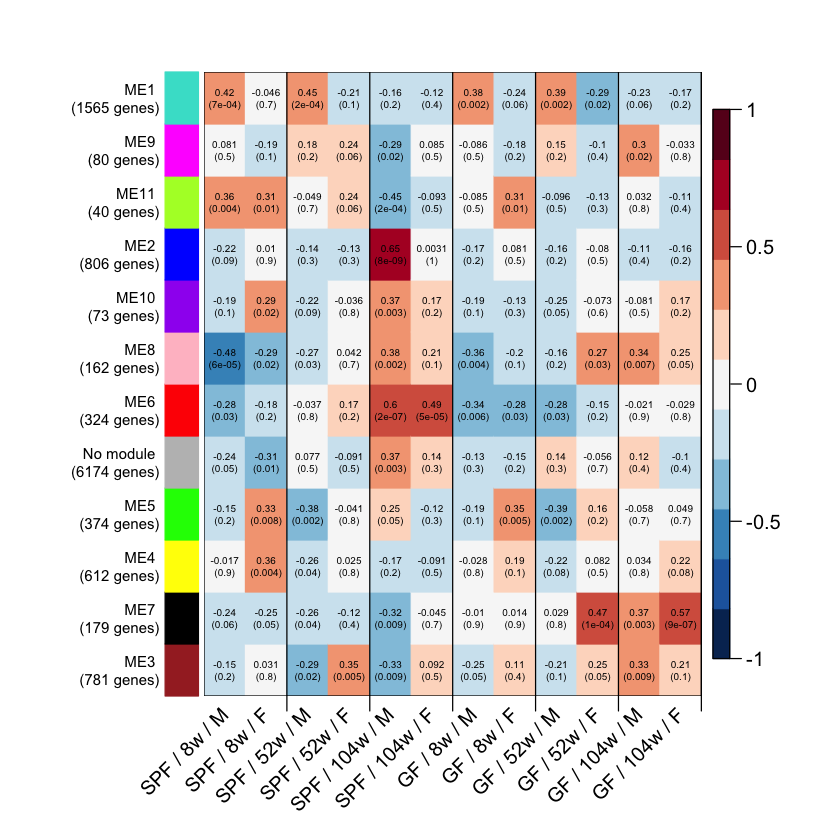

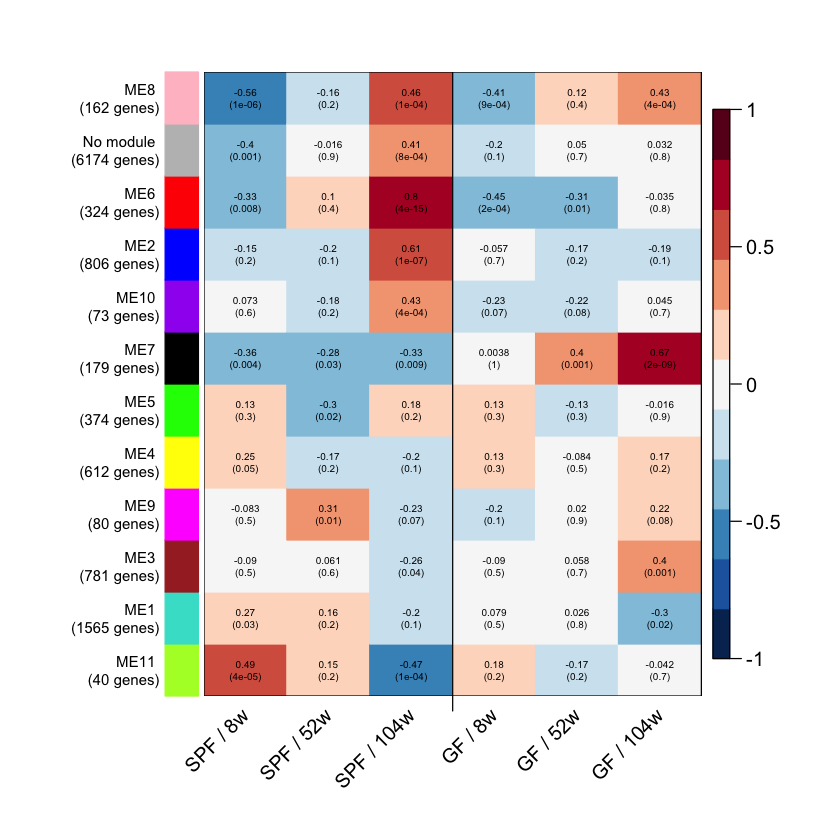

In [50]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("SPF / 8w / M", "SPF / 8w / F",
                    "SPF / 52w / M", "SPF / 52w / F",
                    "SPF / 104w / M", "SPF / 104w / F",
                    "GF / 8w / M", "GF / 8w / F",
                    "GF / 52w / M", "GF / 52w / F",
                    "GF / 104w / M", "GF / 104w / F")
plot_module_groups(trait, seq(2, 12, by = 2))
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("SPF / 8w", "SPF / 52w", "SPF / 104w", "GF / 8w", "GF / 52w", "GF / 104w")
plot_module_groups(trait, c(3))

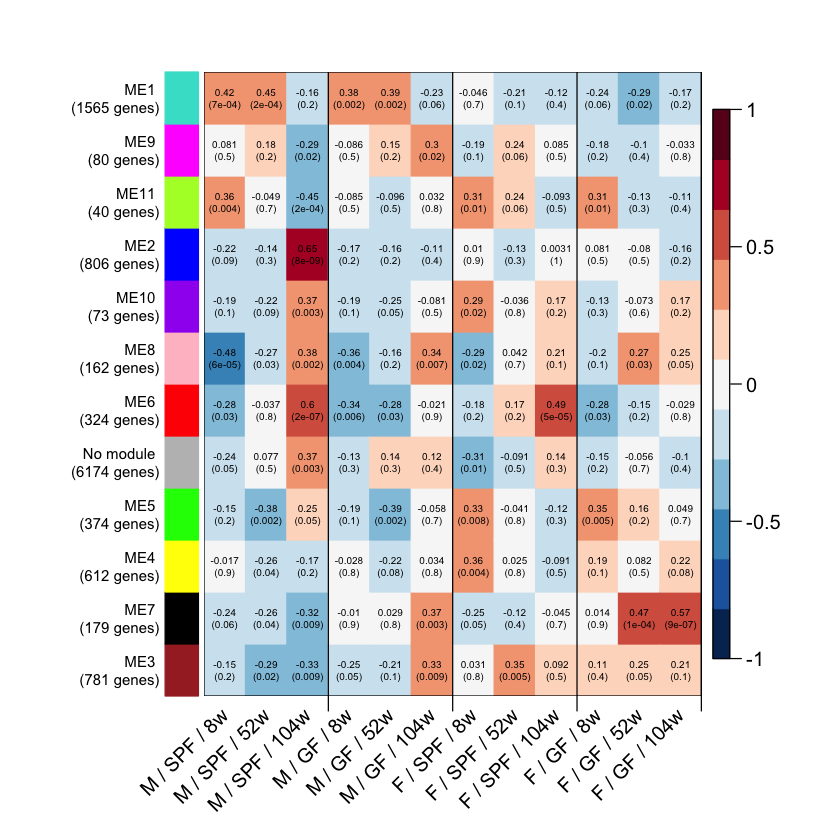

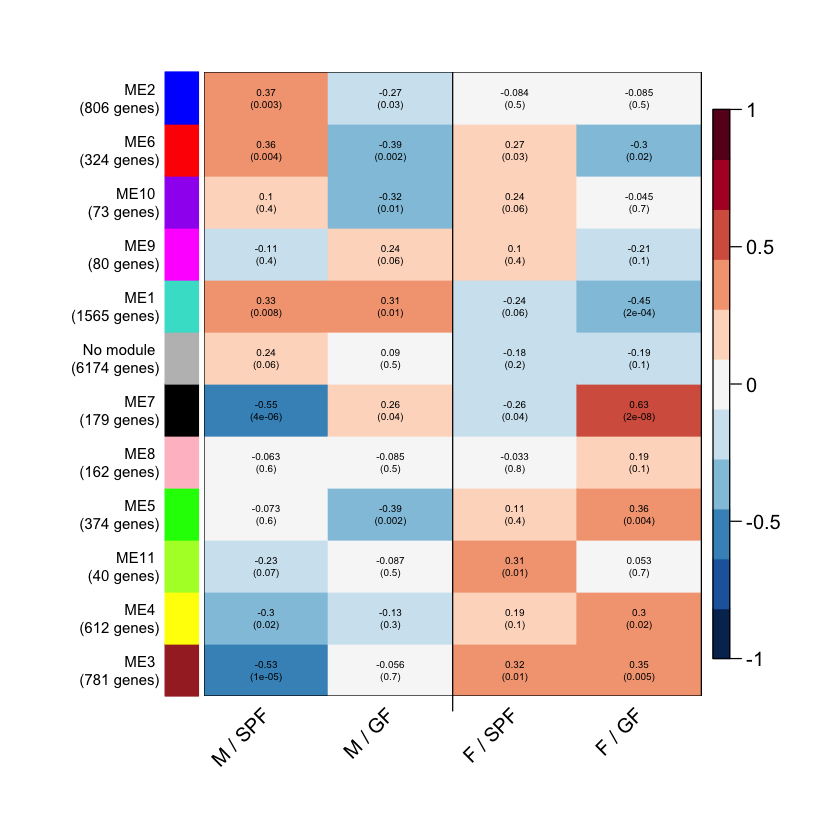

In [51]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("M / SPF / 8w", "M / SPF / 52w", "M / SPF / 104w",
                    "M / GF / 8w", "M / GF / 52w", "M / GF / 104w",
                    "F / SPF / 8w", "F / SPF / 52w", "F / SPF / 104w",
                    "F / GF / 8w", "F / GF / 52w", "F / GF / 104w")
plot_module_groups(trait, seq(3, 12, by = 3))
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F"))
colnames(trait) = c("M / SPF", "M / GF", "F / SPF", "F / GF")
plot_module_groups(trait, c(2))

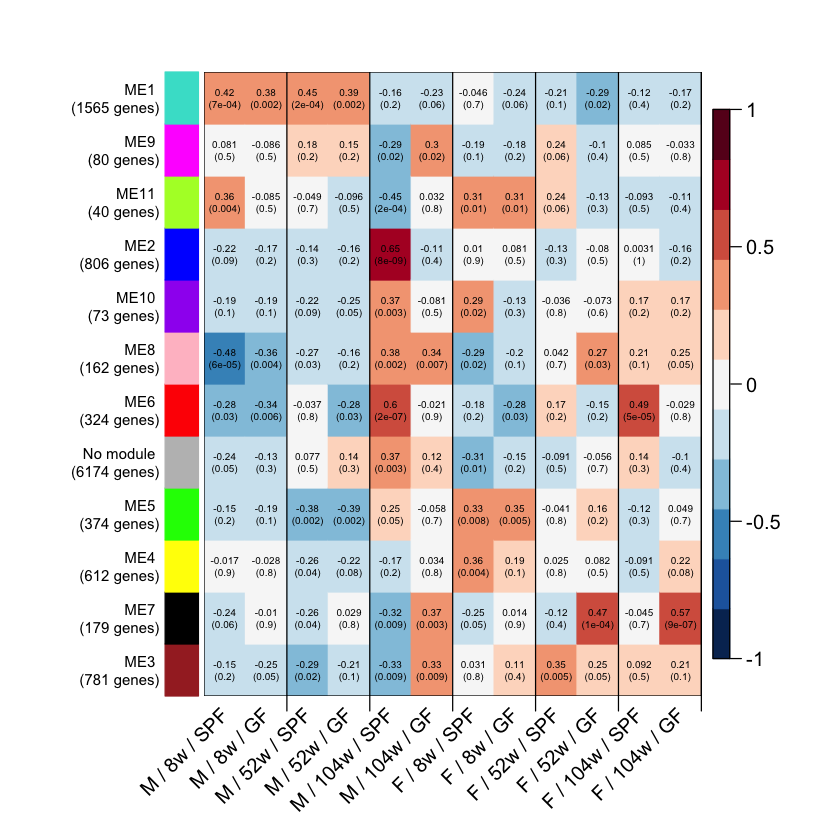

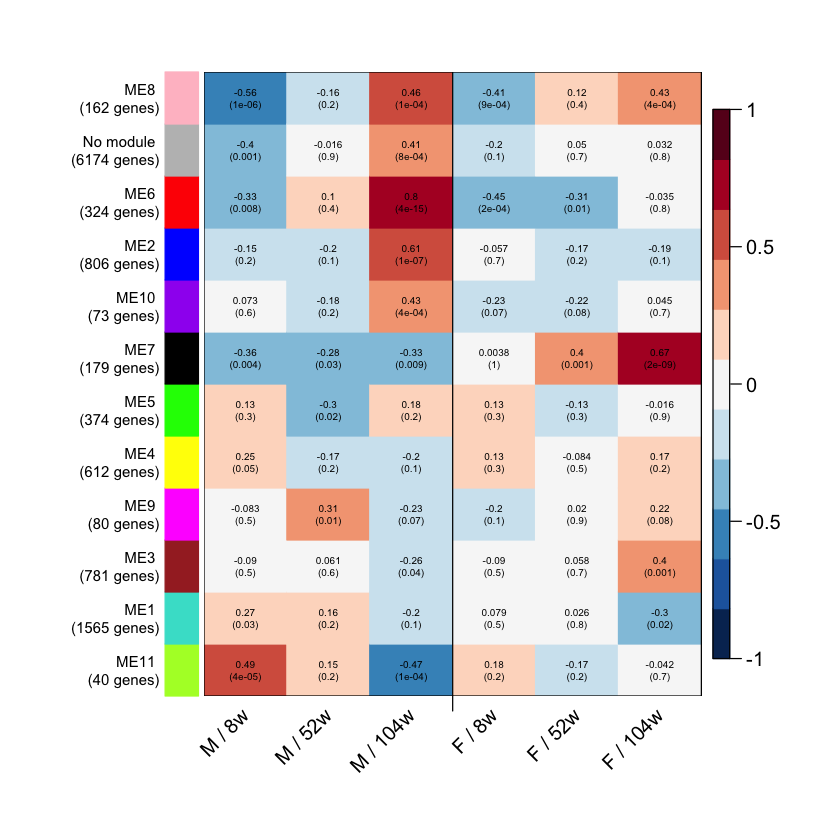

In [52]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("M / 8w / SPF", "M / 8w / GF",
                    "M / 52w / SPF", "M / 52w / GF",
                    "M / 104w / SPF", "M / 104w / GF",
                    "F / 8w / SPF", "F / 8w / GF",
                    "F / 52w / SPF", "F / 52w / GF",
                    "F / 104w / SPF", "F / 104w / GF")
plot_module_groups(trait, seq(2, 12, by = 2))
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("M / 8w", "M / 52w", "M / 104w", "F / 8w", "F / 52w", "F / 104w")
plot_module_groups(trait, c(3))

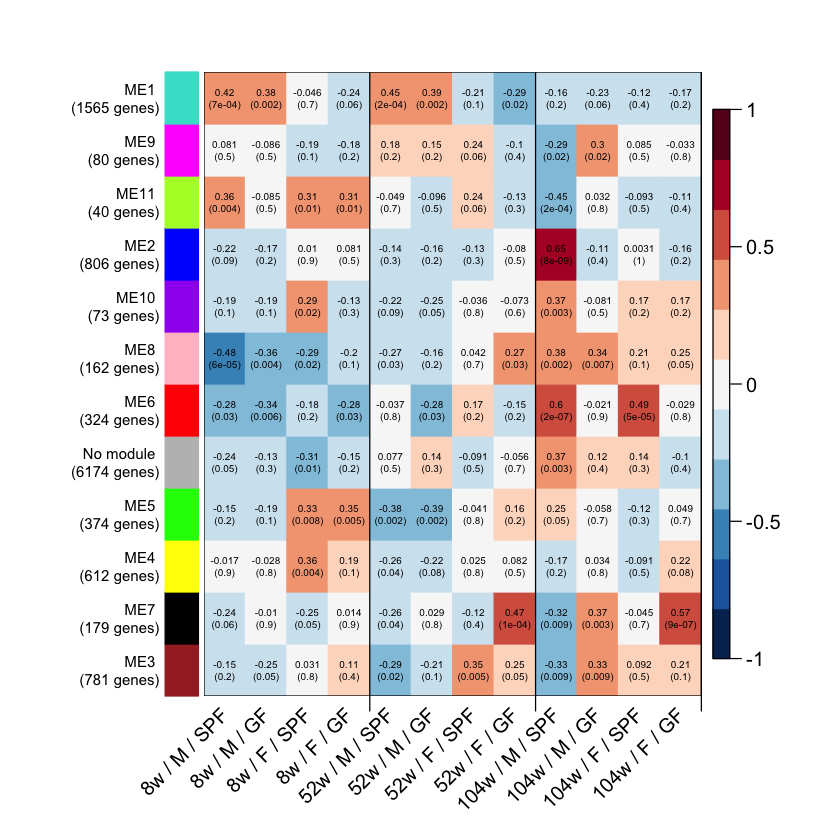

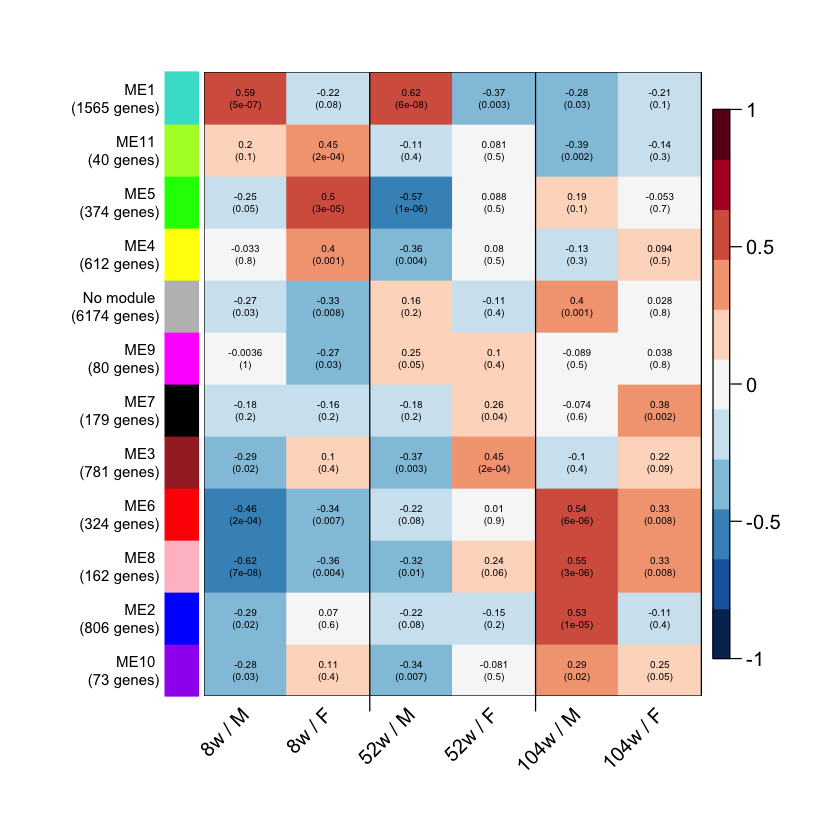

In [53]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("8w / M / SPF", "8w / M / GF", "8w / F / SPF", "8w / F / GF",
                    "52w / M / SPF", "52w / M / GF", "52w / F / SPF", "52w / F / GF",
                    "104w / M / SPF", "104w / M / GF", "104w / F / SPF", "104w / F / GF")
plot_module_groups(trait, seq(4, 12, by = 4))
trait = cbind(as.integer(order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("8w / M", "8w / F", "52w / M", "52w / F", "104w / M", "104w / F")
plot_module_groups(trait, c(2,4))

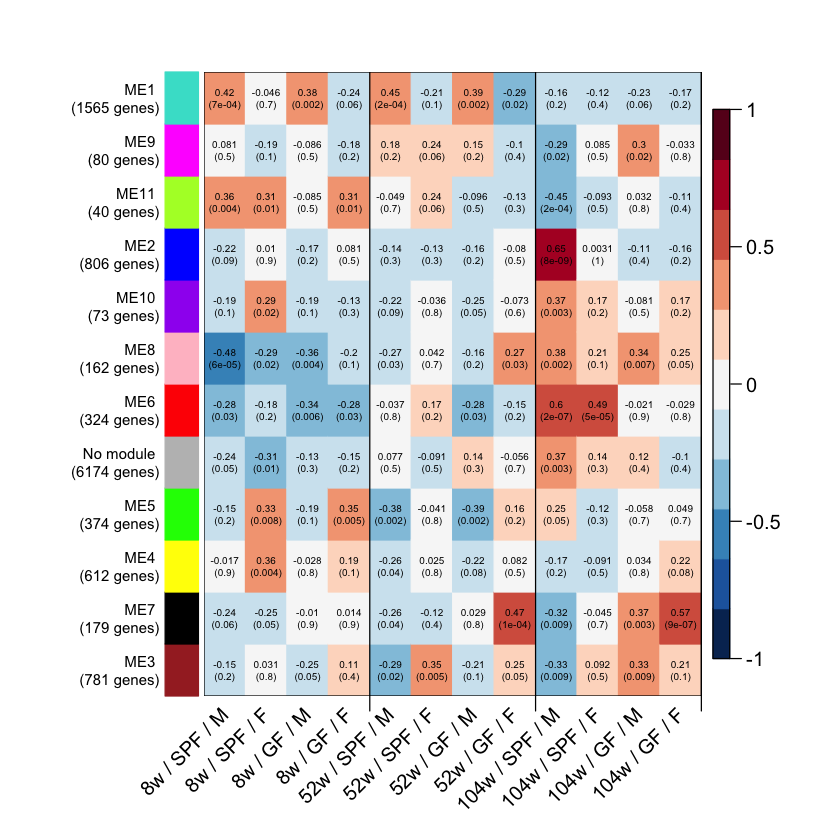

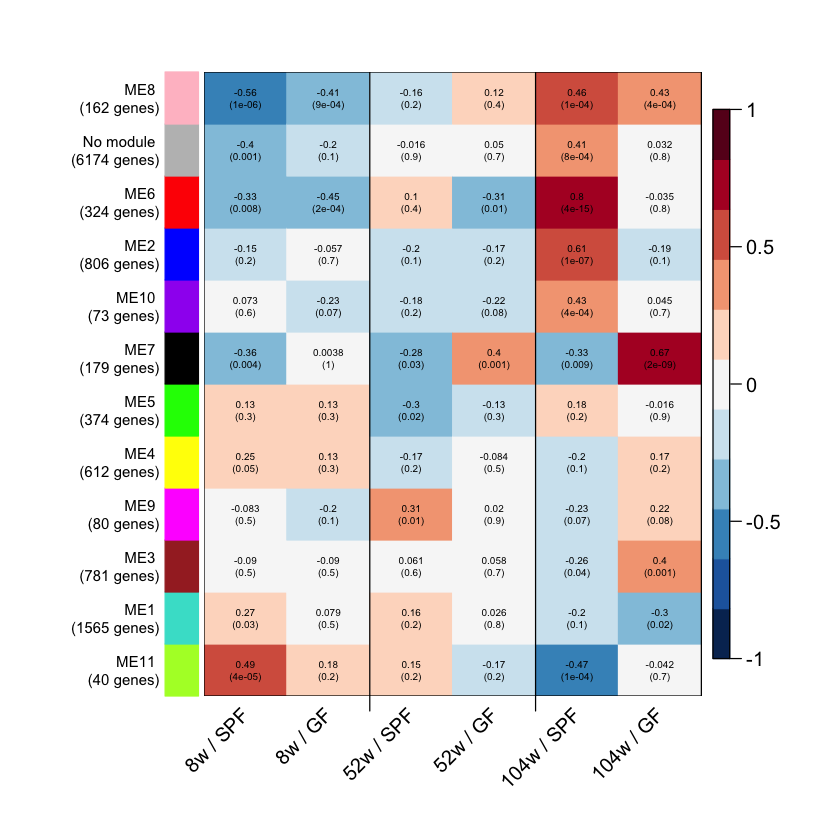

In [54]:
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "M" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'gender'] == "F" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("8w / SPF / M", "8w / SPF / F", "8w / GF / M", "8w / GF / F",
                    "52w / SPF / M", "52w / SPF / F", "52w / GF / M", "52w / GF / F",
                    "104w / SPF / M", "104w / SPF / F", "104w / GF / M", "104w / GF / F")
plot_module_groups(trait, seq(4, 12, by = 4))
trait = cbind(as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "8w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "52w"),
              as.integer(order_metadata[,'type'] == "SPF" & order_metadata[,'age'] == "104w"),
              as.integer(order_metadata[,'type'] == "GF" & order_metadata[,'age'] == "104w"))
colnames(trait) = c("8w / SPF", "8w / GF", "52w / SPF", "52w / GF", "104w / SPF", "104w / GF")
plot_module_groups(trait, c(2,4))

## Functional gene network

In [55]:
# Get the genes that are DE at least once
fc_files = list.files(path = "../results/dge",
                      pattern = "fc_deg",
                      full.names = TRUE,
                      recursive = TRUE)
get_sign_genes = function(x){
    table = read.table(x, sep = "\t", h = TRUE, row.names = 1)
    sign_genes = apply((abs(table)>=log2(1.5))*1, 1, sum, na.rm = TRUE)>0
    return(rownames(table)[sign_genes])
}
genes = unique(unlist(sapply(fc_files, get_sign_genes)))
c(length(genes), dim(norm_counts)[1])

[1]  6537 24421

In [56]:
# Get the GO that are over or under represented at least once
fc_files = list.files(path = "../results/dge",
                      pattern = "over_represented_GO",
                      full.names = TRUE,
                      recursive = TRUE)
over_GO = unique(unlist(sapply(fc_files, function(x) rownames(read.table(x, sep = "\t", h = TRUE, row.names = 1)))))
fc_files = list.files(path = "../results/dge",
                      pattern = "under_represented_GO",
                      full.names = TRUE,
                      recursive = TRUE)
under_GO = unique(unlist(sapply(fc_files, function(x) rownames(read.table(x, sep = "\t", h = TRUE, row.names = 1)))))
GOs = unique(c(over_GO, under_GO))
c(length(over_GO), length(under_GO), length(GOs))

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, de

[1] 1341  182 1513

In [57]:
go_tree = getAmigoTree(goIDs=GOs,
                       color=rep("red", length(GOs)),
                       filename="../results/dge/global_GO_network",
                       picType="svg",
                       saveResult=TRUE)
go_tree = getAmigoTree(goIDs=GOs,
                       color=rep("red", length(GOs)),
                       filename="../results/dge/global_GO_network",
                       picType="png",
                       saveResult=TRUE)

![](../results/dge/global_GO_network.png)

Tree with all GOs at "../results/dge/global_GO_network.png"

In [58]:
top_go = c("GO:0008150", "GO:0005575", "GO:0003674")
top_go %in% GOs

[1] FALSE FALSE FALSE

In [59]:
# Get for each gene the associated GO terms
go_genes = getgo(toupper(genes), 'mm10', 'geneSymbol')
length(go_genes)
# Keep genes not NA
go_gene_names = names(go_genes)[!is.na(names(go_genes))]
# Keep only GO term that are over or under represented at least once
go_genes = sapply(go_gene_names, function(x) go_genes[[x]][go_genes[[x]] %in% GOs])
length(go_genes)
# Remove genes with no GOs
go_gene_names = names(go_genes)[sapply(names(go_genes), function(x) length(go_genes[[x]])>0)]                  
go_genes = sapply(go_gene_names, function(x) go_genes[[x]])
length(go_genes)
head(go_genes)

[1] 6537

[1] 6207

[1] 5643

$`0610009O20RIK`
 [1] "GO:0006508" "GO:0006915" "GO:0007154" "GO:0007165" "GO:0007166"
 [6] "GO:0008152" "GO:0008219" "GO:0009987" "GO:0010941" "GO:0012501"
[11] "GO:0019222" "GO:0019538" "GO:0023052" "GO:0042981" "GO:0043067"
[16] "GO:0043170" "GO:0043281" "GO:0044238" "GO:0044699" "GO:0044700"
[21] "GO:0044763" "GO:0050789" "GO:0050790" "GO:0050794" "GO:0050896"
[26] "GO:0051246" "GO:0051716" "GO:0060255" "GO:0065007" "GO:0071704"
[31] "GO:0080090" "GO:0097190" "GO:0005622" "GO:0005623" "GO:0005737"
[36] "GO:0043226" "GO:0043227" "GO:0043229" "GO:0043231" "GO:0044424"
[41] "GO:0044464"

$FMC1
 [1] "GO:0008152" "GO:0008283" "GO:0009987" "GO:0019222" "GO:0042127"
 [6] "GO:0044238" "GO:0044699" "GO:0048519" "GO:0050789" "GO:0050794"
[11] "GO:0061469" "GO:0065007" "GO:0071704" "GO:0080090" "GO:0005622"
[16] "GO:0005623" "GO:0005737" "GO:0043226" "GO:0043227" "GO:0043229"
[21] "GO:0043231" "GO:0044424" "GO:0044464"

$`1190002N15RIK`
 [1] "GO:0007154" "GO:0007165" "GO:0007275" "GO:0008283" "GO:0009966"
 [6] "GO:0009987" "GO:0010646" "GO:0023051" "GO:0023052" "GO:0032501"
[11] "GO:0032502" "GO:0035556" "GO:0044699" "GO:0044700" "GO:0044707"
[16] "GO:0044763" "GO:0044767" "GO:0048513" "GO:0048583" "GO:0048731"
[21] "GO:0048856" "GO:0050789" "GO:0050794" "GO:0050896" "GO:0051179"
[26] "GO:0051716" "GO:0065007" "GO:1902531" "GO:0005576" "GO:0005615"
[31] "GO:0005622" "GO:0005623" "GO:0005737" "GO:0016020" "GO:0031982"
[36] "GO:0031988" "GO:0032991" "GO:0043226" "GO:0043227" "GO:0043229"
[41] "GO:0043231" "GO:0044421" "GO:0044422" "GO:0044424" "GO:0044425"
[46] "GO:0044446" "GO:0044464"

$`1600002K03RIK`
[1] "GO:0005576" "GO:0005622" "GO:0005623" "GO:0005737" "GO:0016020"
[6] "GO:0031224" "GO:0044424" "GO:0044425" "GO:0044464"

$`1600014C10RIK`
 [1] "GO:0005622" "GO:0005623" "GO:0005737" "GO:0016020" "GO:0031224"
 [6] "GO:0043226" "GO:0043227" "GO:0043229" "GO:0043231" "GO:0044424"
[11] "GO:0044425" "GO:0044464"

$`1700029J07RIK`
 [1] "GO:0005622" "GO:0005623" "GO:0005737" "GO:0005856" "GO:0015630"
 [6] "GO:0043226" "GO:0043228" "GO:0043229" "GO:0043232" "GO:0044422"
[11] "GO:0044424" "GO:0044430" "GO:0044446" "GO:0044464"

## Median of gene counts in the modules over ages

In [60]:
metadata = t(sapply(sapply(colnames(norm_counts), strsplit, split = "_"), unlist))
metadata = metadata[,-5]
colnames(metadata) = c("type", "age", "gender", "replicate")
sample_order = rownames(metadata)[order(metadata[,'age'], metadata[,'type'], metadata[,'gender'], decreasing = T)]
metadata = metadata[sample_order,]

In [61]:
plot_module_count = function(mod_id, norm_counts, connected_gene_colors, sample_order){
    module_genes = names(connected_gene_colors)[which(connected_gene_colors==mod_id)]
    module_genes = module_genes[module_genes %in% rownames(norm_counts)]
    module_counts = norm_counts[module_genes, sample_order]
    mat = data.frame(samples = as.factor(colnames(module_counts)),
                 type = as.factor(metadata[sample_order, 'type']),
                 age = as.factor(metadata[sample_order, 'age']),
                 gender = as.factor(metadata[sample_order, 'gender']),
                 type_gender = as.factor(paste(metadata[sample_order, 'type'], metadata[sample_order, 'gender'])),
                 mean = apply(module_counts,2,mean),
                 sd = apply(module_counts,2,sd),
                 median = apply(module_counts,2,median),
                 row.names = NULL)
    mat$samples = factor(mat$samples, levels = colnames(module_counts))
    p = ggplot(mat, aes(x=samples, y=median, group = type_gender, color = age)) +
      geom_point() + 
      theme(axis.text.x = element_blank()) +
      facet_grid(gender ~ type) +
      ggtitle(paste("ME", mod_id))
    print(p)
}

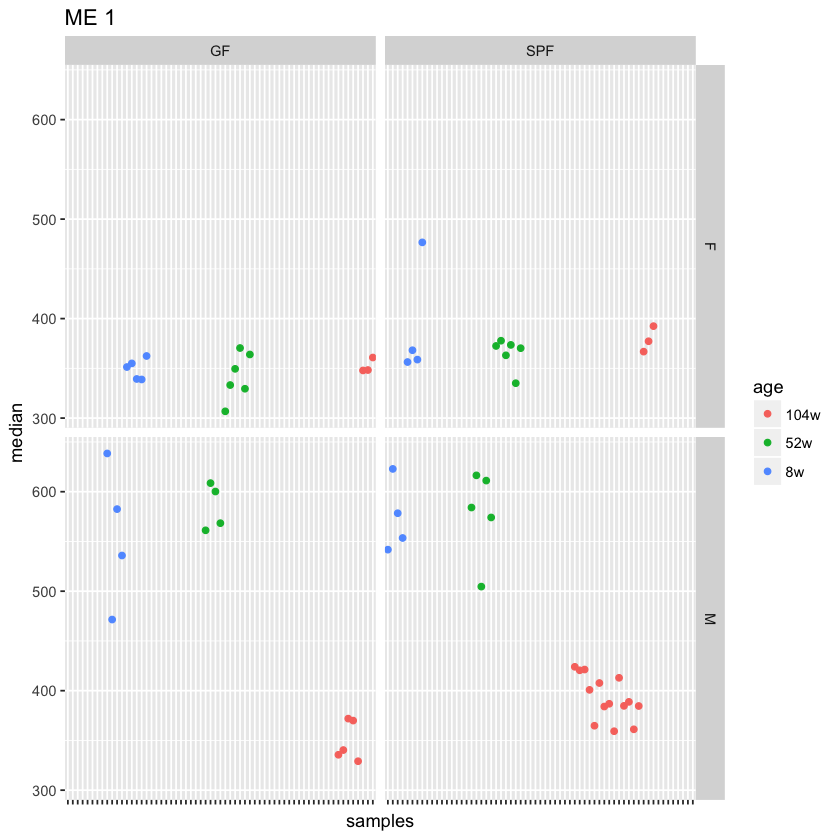

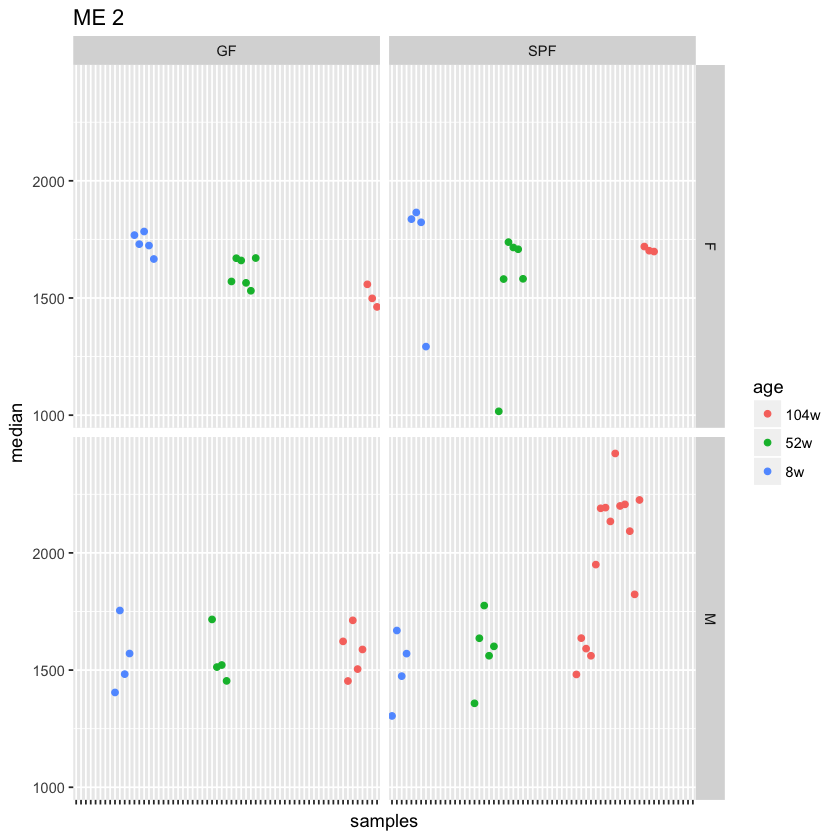

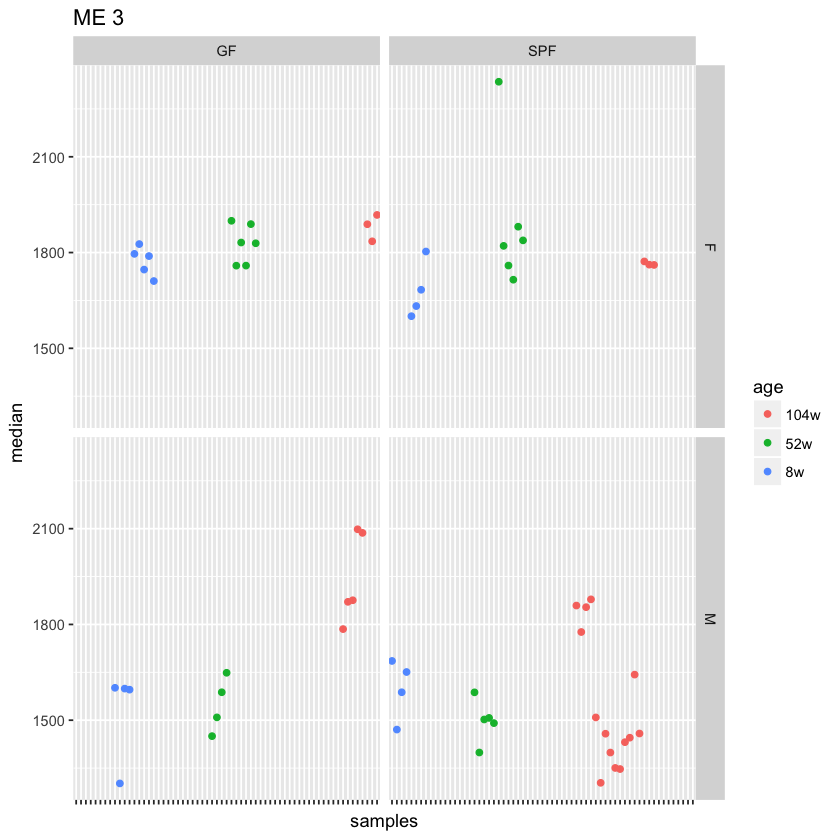

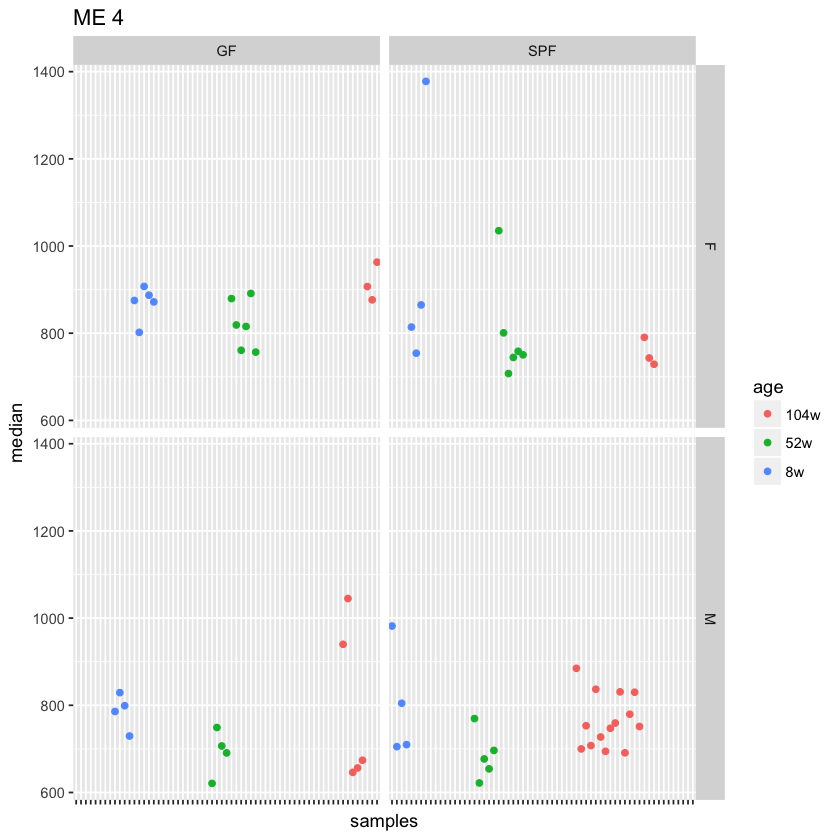

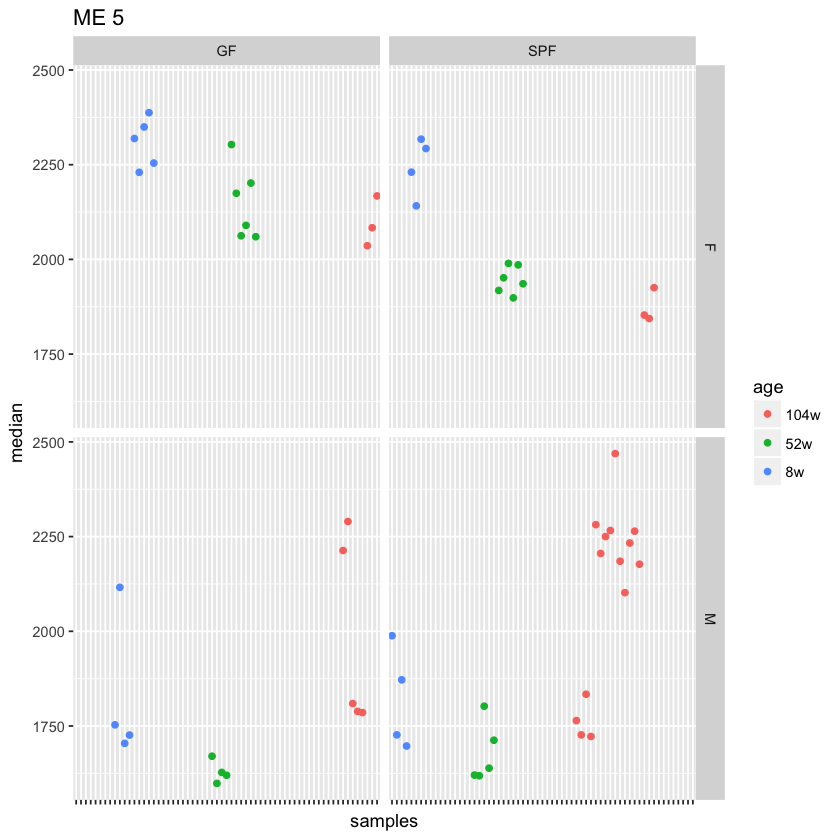

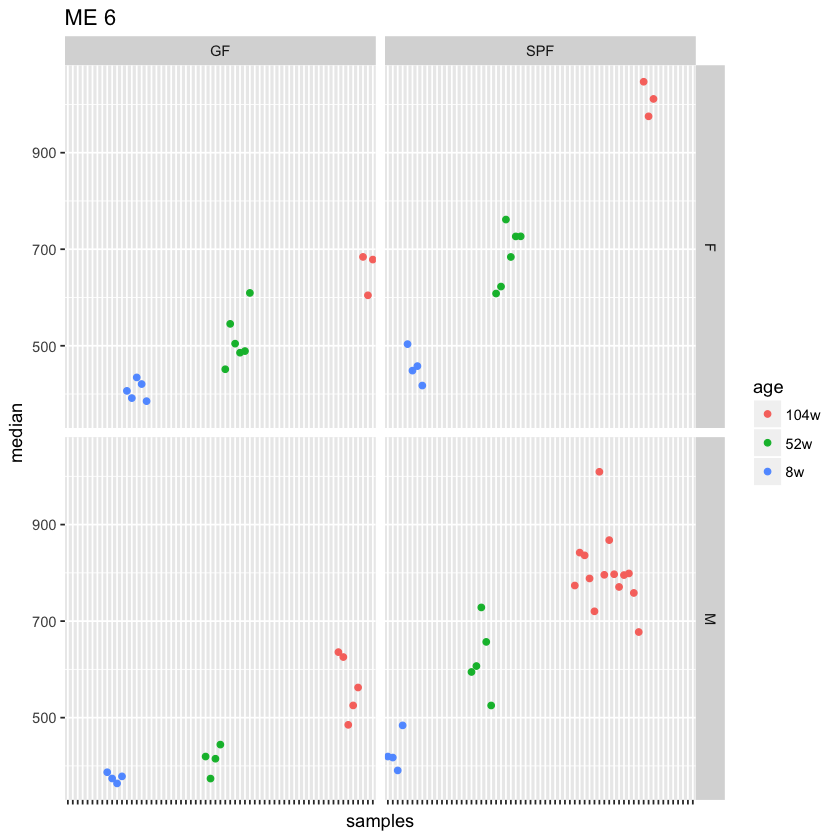

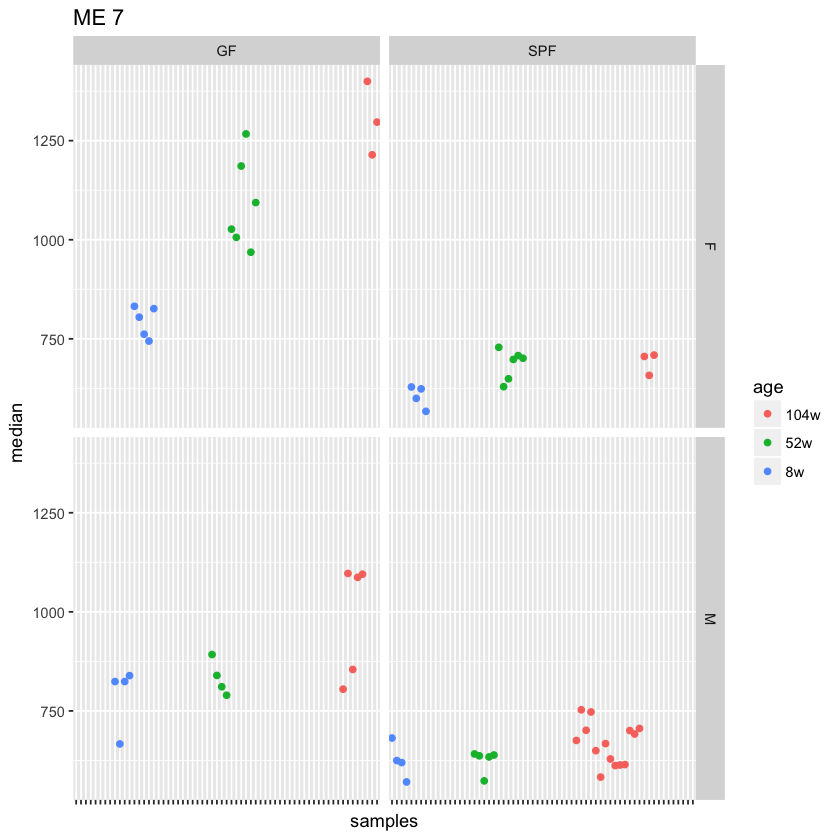

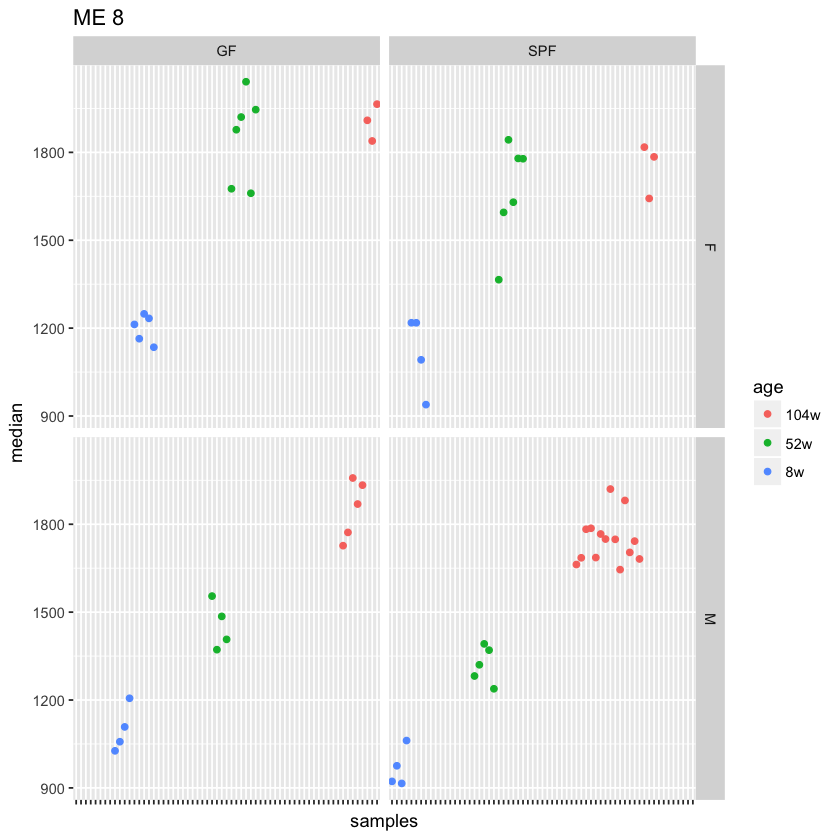

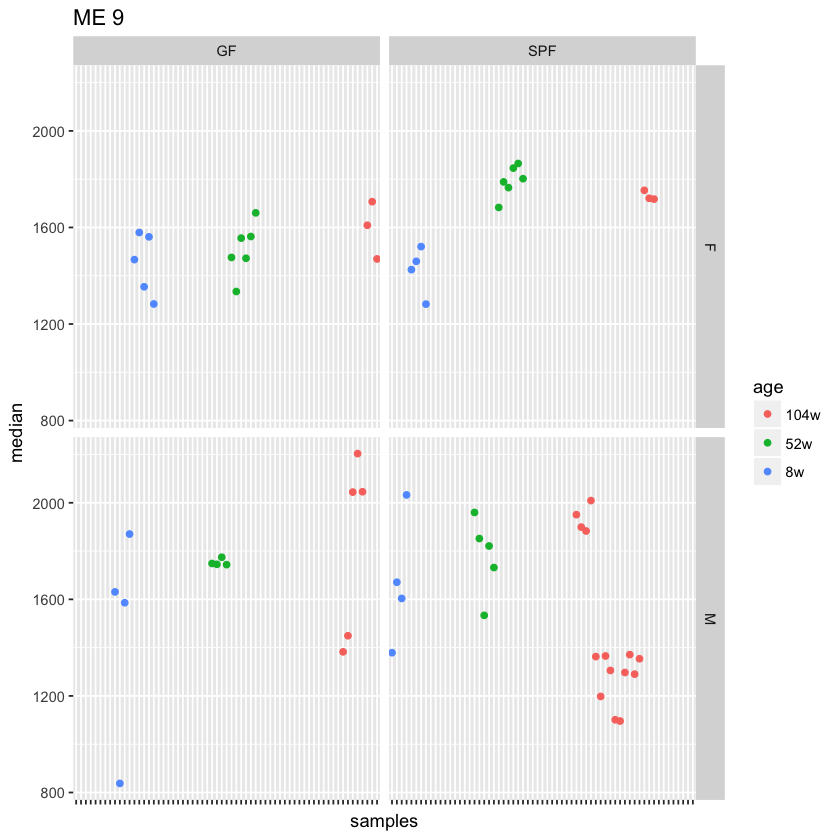

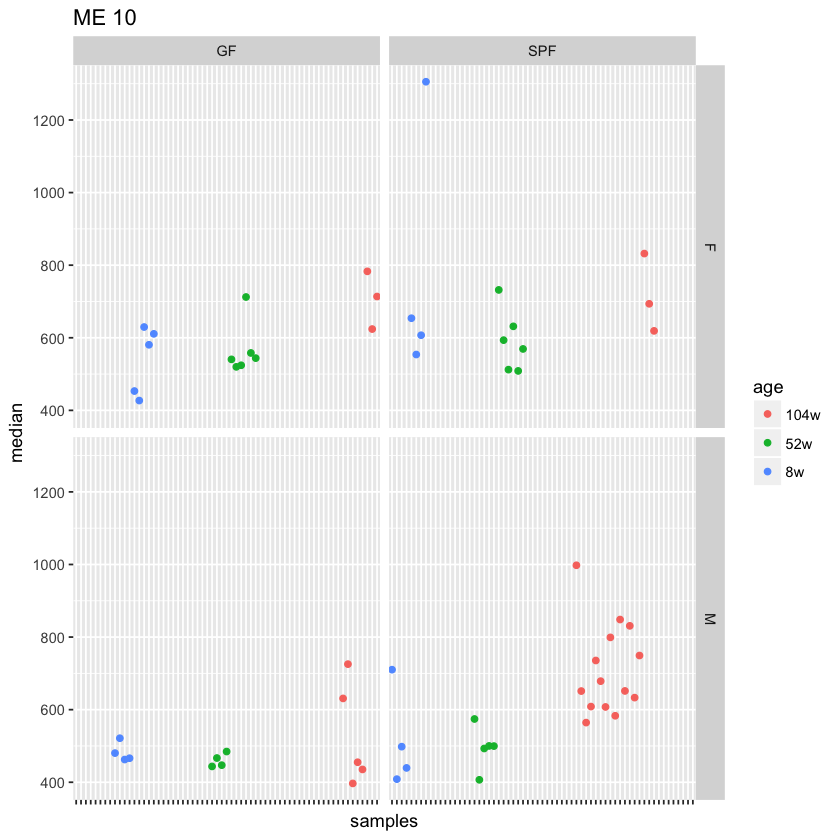

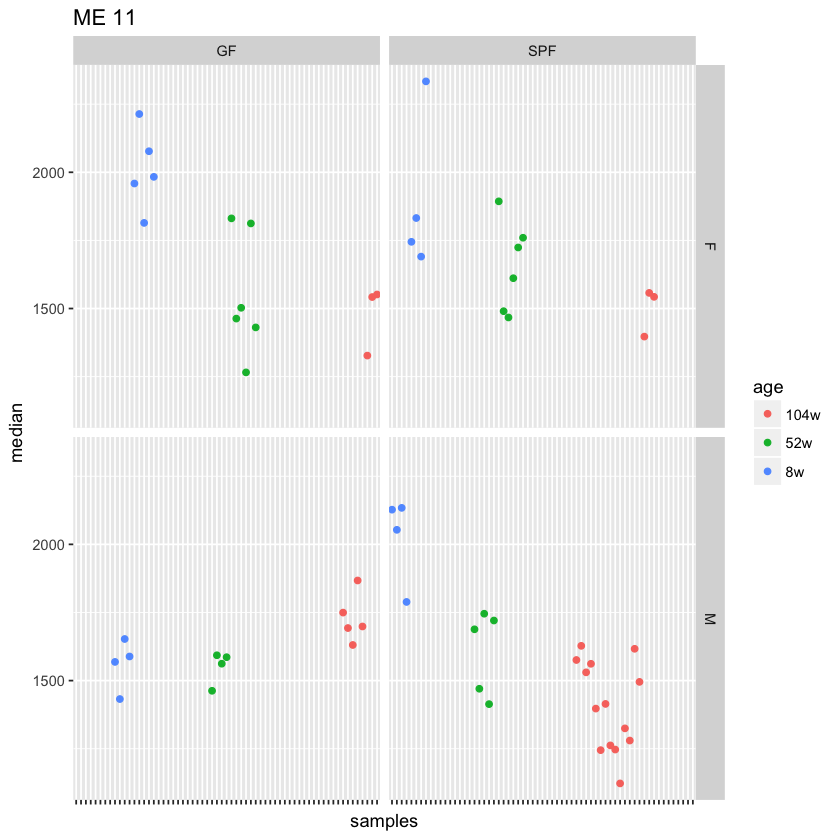

In [62]:
for(i in 1:module_nb){
    plot_module_count(i, norm_counts, connected_gene_colors, sample_order)
}